# 7.9 Applied

In [1]:
!pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 4.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.

In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (summarize,
poly,
ModelSpec as MS)
from statsmodels.stats.anova import anova_lm
import sklearn.model_selection as skm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,train_test_split
import seaborn as sns
import sklearn as sk
from patsy import dmatrix

from pygam import (s as s_gam, l as l_gam, f as f_gam, LinearGAM, LogisticGAM)
from ISLP.transforms import (BSpline, NaturalSpline)
from ISLP.models import bs, ns
from ISLP.pygam import (approx_lam, degrees_of_freedom, plot as plot_gam, anova as anova_gam)

## Question - 6. In this exercise, you will further analyze the Wage data set considered throughout this chapter.

### (a) Perform polynomial regression to predict wage using age. Use cross-validation to select the optimal degree d for the polynomial. What degree was chosen, and how does this compare to the results of hypothesis testing using ANOVA? Make a plot of the resulting polynomial ft to the data.

In [ ]:
wage = load_data('Wage')

In [ ]:
wage.head()

year  age            maritl      race        education              region  \
0  2006   18  1. Never Married  1. White     1. < HS Grad  2. Middle Atlantic   
1  2004   24  1. Never Married  1. White  4. College Grad  2. Middle Atlantic   
2  2003   45        2. Married  1. White  3. Some College  2. Middle Atlantic   
3  2003   43        2. Married  3. Asian  4. College Grad  2. Middle Atlantic   
4  2005   50       4. Divorced  1. White       2. HS Grad  2. Middle Atlantic   

         jobclass          health health_ins   logwage        wage  
0   1. Industrial       1. <=Good      2. No  4.318063   75.043154  
1  2. Information  2. >=Very Good      2. No  4.255273   70.476020  
2   1. Industrial       1. <=Good     1. Yes  4.875061  130.982177  
3  2. Information  2. >=Very Good     1. Yes  5.041393  154.685293  
4  2. Information       1. <=Good     1. Yes  4.318063   75.043154

In [ ]:
predictors = 'age'
outcome = 'wage'

X_train, X_test, y_train, y_test = skm.train_test_split(wage[predictors], wage[outcome], test_size = 0.25, random_state = 0)

In [ ]:
def polyCrossValidation(X,y, exp):
  scores = np.array([])
  for i in range(1, exp + 1):
    poly = PolynomialFeatures(degree = i)
    model_poly = poly.fit_transform(X_train.to_frame())
    lr = LinearRegression()
    scores = np.append(scores, -np.mean(cross_val_score(lr, model_poly, y_train, scoring = 'neg_mean_squared_error',cv = 10)))
  return scores


In [ ]:
scores = polyCrossValidation(X_train, y_train , 15)

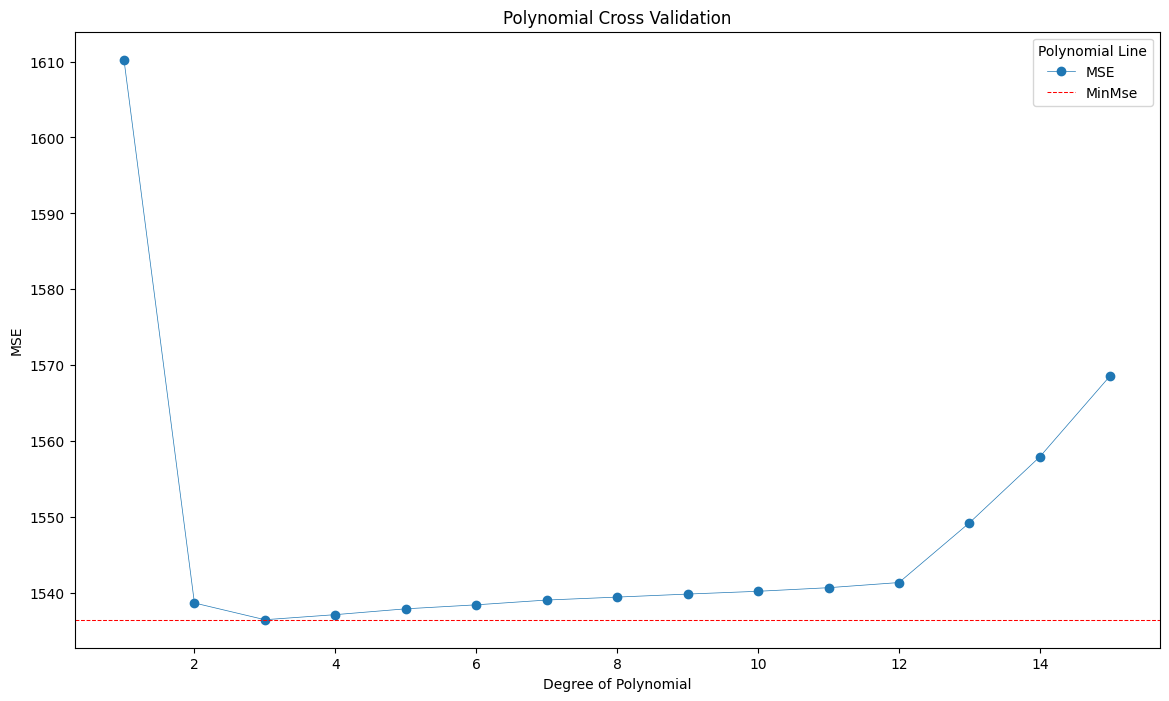

In [ ]:
plt.figure(figsize = (14,8))
plt.plot(range(1,16), scores, marker = 'o', linewidth =.5, label = 'MSE')
plt.axhline(min(scores), color = 'red', linewidth = .75, linestyle = '--', label = 'MinMse')
plt.xlabel('Degree of Polynomial')
plt.ylabel('MSE')
plt.title('Polynomial Cross Validation')
plt.legend(title = 'Polynomial Line')

In [ ]:
def Anova_testing(X,y, exp):
  models = np.array([])
  for i in range(1, exp+ 1):
    poly = PolynomialFeatures(degree = i)
    poly_model = poly.fit_transform(X.to_frame())
    model = sm.OLS(y, poly_model).fit()
    models = np.append(models, model)
  print (anova_lm(*models))

In [ ]:
Anova_testing(X_train, y_train, 15)

    df_resid           ssr  df_diff       ss_diff          F        Pr(>F)
0     2248.0  3.613824e+06      0.0           NaN        NaN           NaN
1     2247.0  3.452896e+06      1.0  1.609273e+05  53.324257  3.906419e-13
2     2246.0  3.444843e+06      1.0  8.053742e+03   2.668657  1.024825e-01
3     2245.0  3.442432e+06      1.0  2.410447e+03   0.798717  3.715732e-01
4     2244.0  3.442427e+06      1.0  5.044632e+00   0.001672  9.673913e-01
5     2243.0  3.441343e+06      1.0  1.084487e+03   0.359352  5.489271e-01
6     2243.0  3.441254e+06     -0.0  8.898068e+01       -inf           NaN
7     2243.0  3.441286e+06     -0.0 -3.250816e+01        inf           NaN
8     2243.0  3.441669e+06     -0.0 -3.827714e+02        inf           NaN
9     2243.0  3.446192e+06     -0.0 -4.522902e+03        inf           NaN
10    2244.0  3.470332e+06     -1.0 -2.413984e+04   7.998885           NaN
11    2244.0  4.122077e+06     -0.0 -6.517451e+05        inf           NaN
12    2244.0  4.788924e+0

#### Results (a)

We can see that polynomial of degree 3 has the smallest Mean Squared Error. The anova said the best fit was for degree 1. We will go with degree 3 and plot it.

In [ ]:
X_test.shape,X_train.shape,y_test.shape,y_train.shape

((750,), (2250,), (750,), (2250,))

In [ ]:
def polyDegreePlot(X_train, y_train, X_test, y_test, degree):
  poly = PolynomialFeatures(degree)
  X = poly.fit_transform(X_train.to_frame())
  y = y_train
  # X.shape

  model = LinearRegression()
  model.fit(X,y)

  X_1 = poly.fit_transform(X_test.to_frame())

  pred= model.predict(X_1)
  plt.figure(figsize = (10,6))
  plt.scatter(X_train,y_train,facecolors='none', edgecolors='darkgray', label = 'Training Data')
  plt.scatter(X_test, pred, label = 'Test Data Predictions')
  plt.xlabel('AGE')
  plt.ylabel('WAGE')
  plt.legend()
  plt.show()

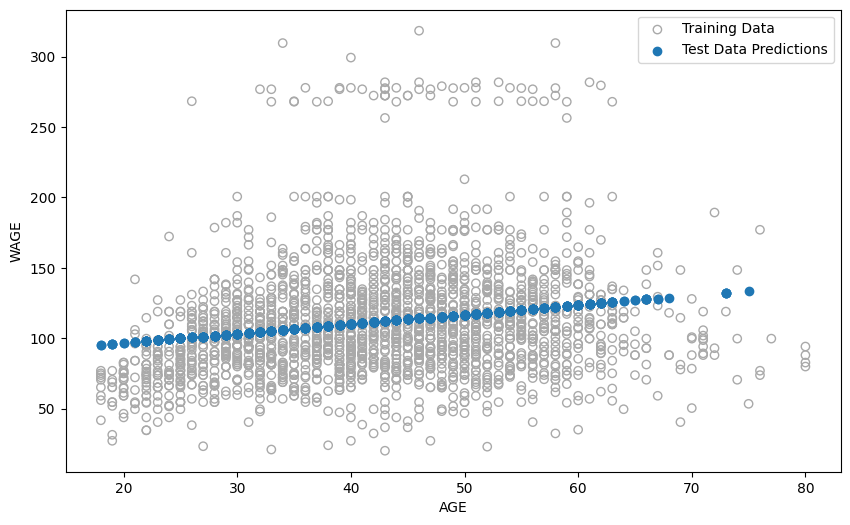

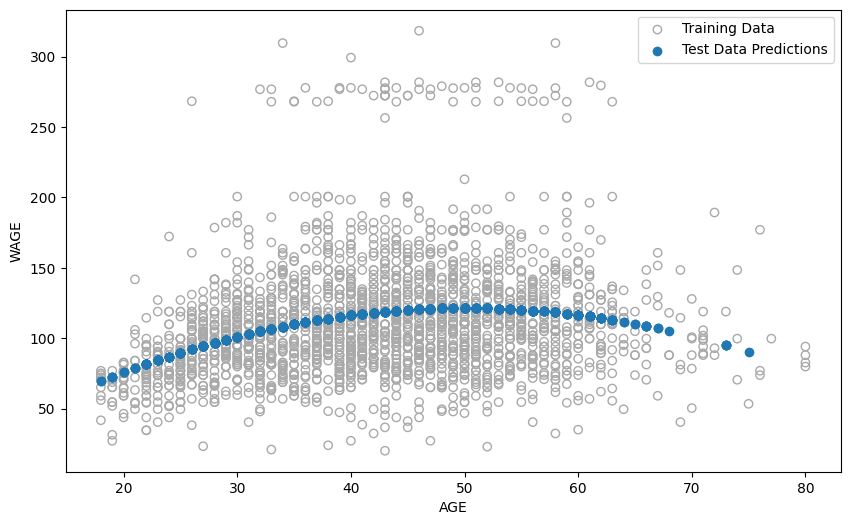

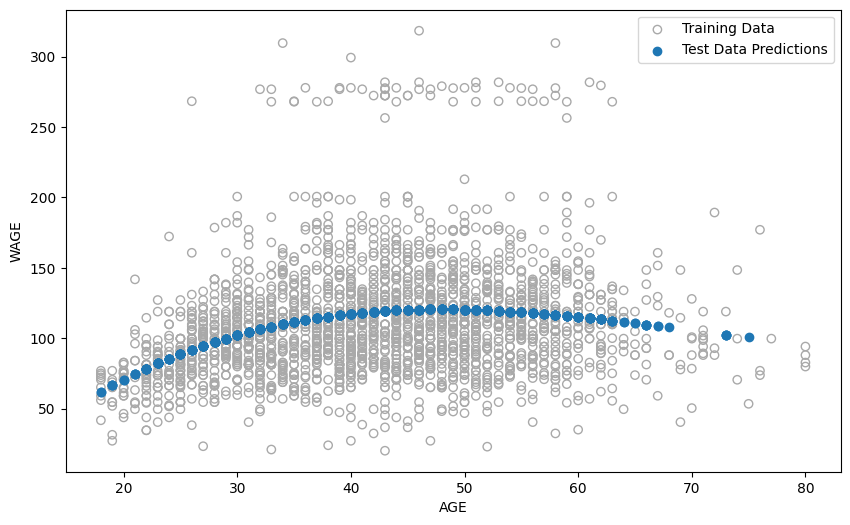

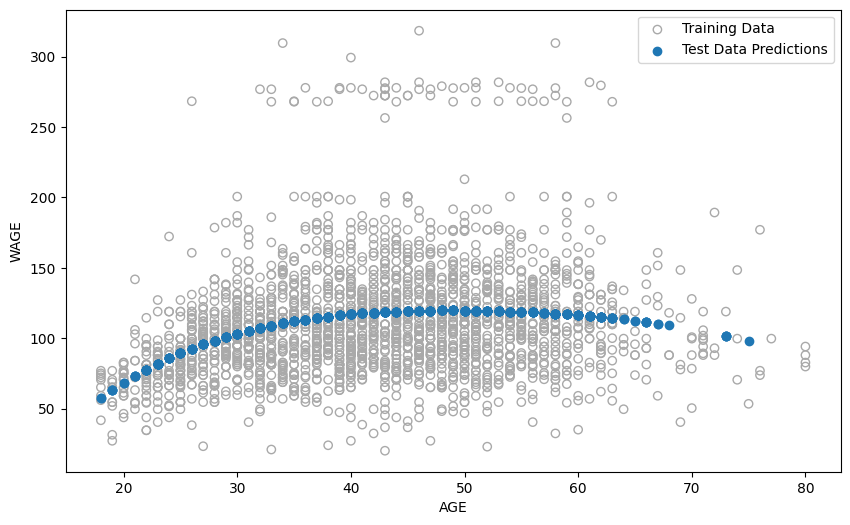

In [ ]:
polyDegreePlot(X_train, y_train, X_test, y_test, 1)
polyDegreePlot(X_train, y_train, X_test, y_test, 2)
polyDegreePlot(X_train, y_train, X_test, y_test, 3)
polyDegreePlot(X_train, y_train, X_test, y_test, 4)


###(b) Fit a step function to predict wage using age, and perform crossvalidation to choose the optimal number of cuts. Make a plot of the fit obtained.

In [ ]:
def stepFunction(X,y, X_train, y_train, cuts):
  scores = np.array([])
  for i in range(2, cuts + 1):
    lr = LinearRegression()
    cut_train = pd.cut(X,i)
    dummies = pd.get_dummies(cut_train)
    model = lr.fit(dummies,y)
    cut_test = pd.cut(X_test, i)
    dummies_test =pd.get_dummies(cut_test)
    pred = model.predict(dummies_test)
    mean_squared_error = np.mean((pred - y_test)**2)
    scores = np.append(scores, mean_squared_error)
  return scores


In [ ]:
scores = stepFunction(X_train, y_train, X_test, y_test, 30)

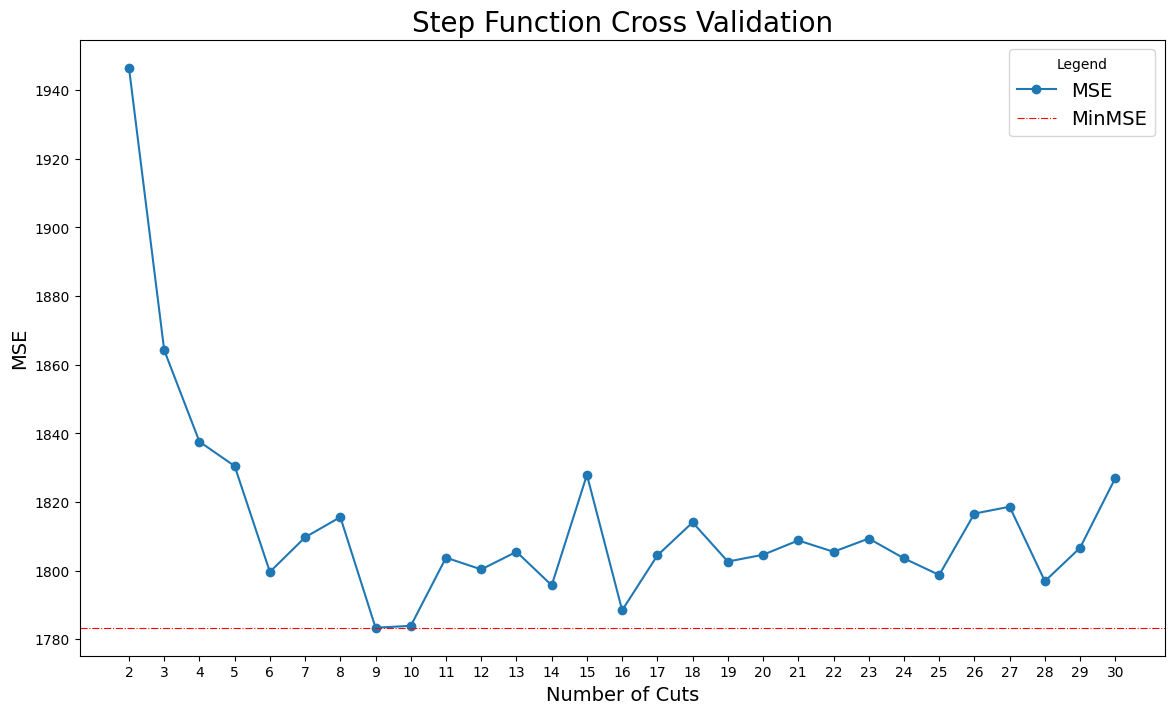

In [ ]:
plt.figure(figsize = (14,8))
plt.plot(range(2,31), scores, marker = 'o', label ='MSE')
plt.axhline(min(scores), color = 'red', linewidth = .8, linestyle = '-.', label = 'MinMSE')
plt.title('Step Function Cross Validation', fontsize = 20)
plt.xlabel('Number of Cuts', fontsize =14)
plt.ylabel('MSE', fontsize =14)
plt.xticks(range(2,31))
plt.legend(title = 'Legend', fontsize = 14)
plt.show()

In [ ]:
def stepCutPlot(X_train, y_train, X_test, y_test, cuts, xName, yName):
  plt.figure(figsize = (14,8))
  lr = LinearRegression()
  cut_train = pd.cut(X_train, cuts)
  cut_test = pd.cut(X_test, cuts)
  dummies_train = pd.get_dummies(cut_train)
  dummies_test = pd.get_dummies(cut_test)
  model = lr.fit(dummies_train, y_train)
  pred = model.predict(dummies_test)

  plt.scatter(X_train, y_train, label = 'Training Data', facecolors = 'none', edgecolors = 'darkgray')
  plt.scatter(X_test, pred, label = 'Test Data Predictions')
  plt.xlabel(xName, fontsize = 14)
  plt.ylabel(yName,fontsize = 14)
  plt.legend(title = 'Legend', fontsize = 14)
  plt.title('Best Fit Step Function on Data', fontsize = 20)
  plt.show()


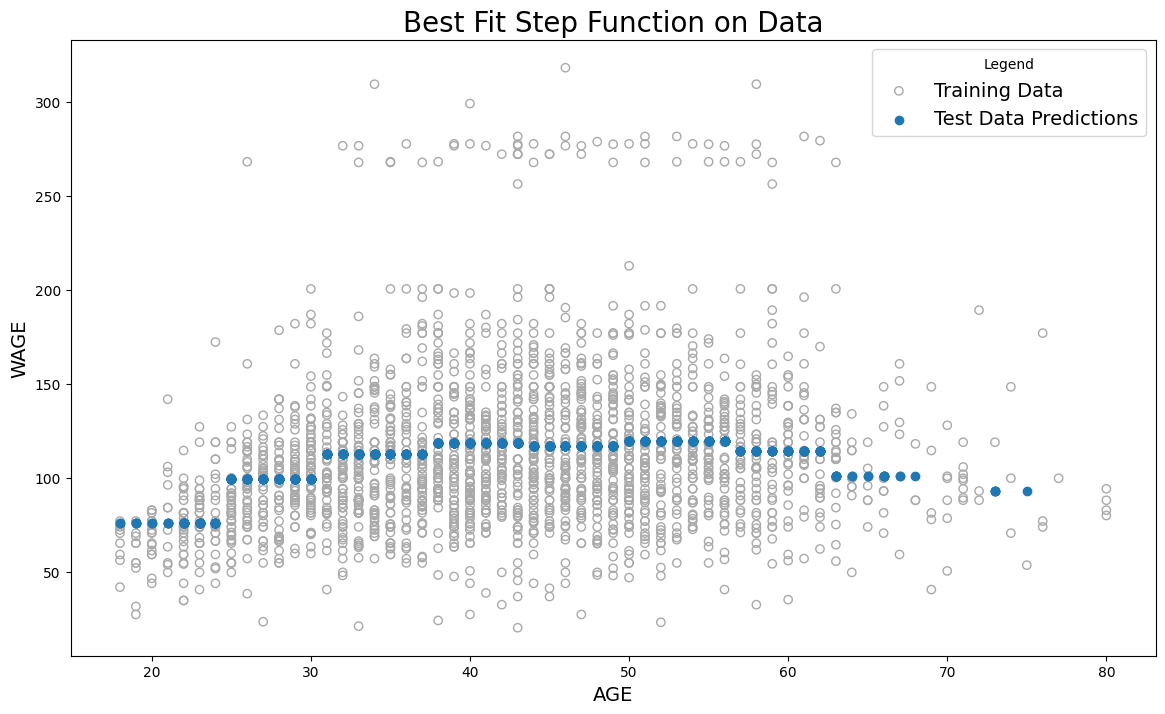

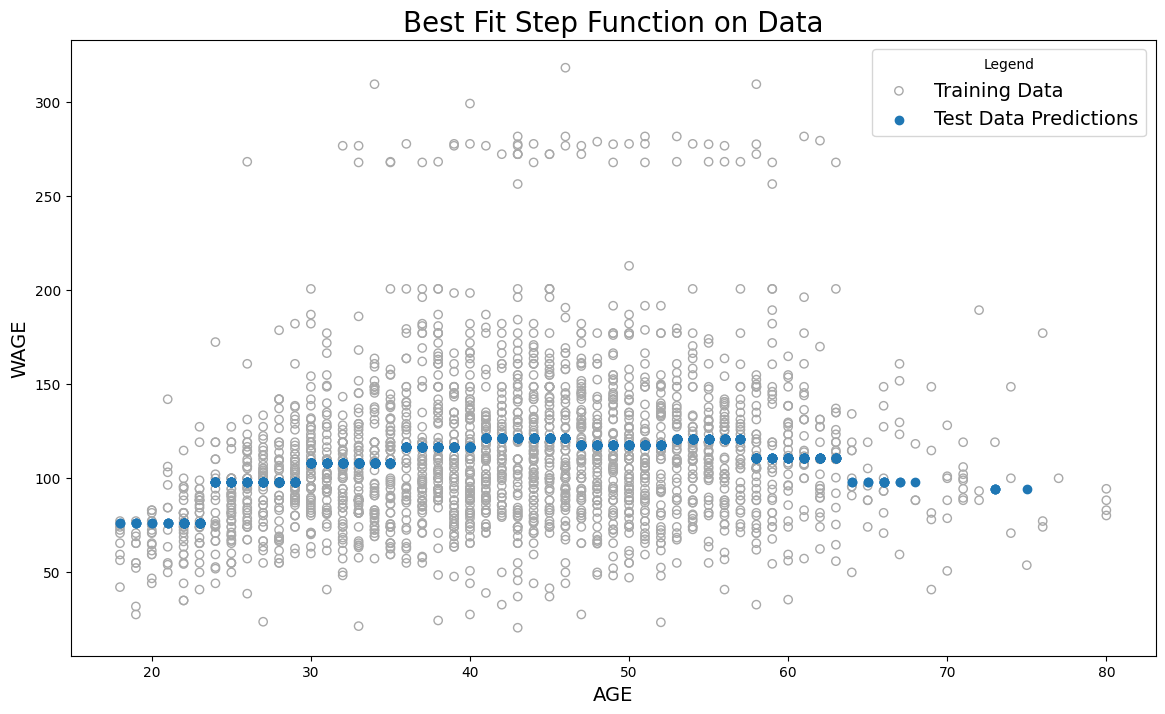

In [ ]:
stepCutPlot(X_train, y_train, X_test, y_test, 9)
stepCutPlot(X_train, y_train, X_test, y_test, 10)

## Question -7. The Wage data set contains a number of other features not explored in this chapter, such as marital status (marital), job class (jobclass), and others. Explore the relationships between some of these other predictors and wage, and use non-linear fitting techniques in order to fit fexible models to the data. Create plots of the results obtained, and write a summary of your fndings.

In [ ]:
wage.head()

year  age            maritl      race        education              region  \
0  2006   18  1. Never Married  1. White     1. < HS Grad  2. Middle Atlantic   
1  2004   24  1. Never Married  1. White  4. College Grad  2. Middle Atlantic   
2  2003   45        2. Married  1. White  3. Some College  2. Middle Atlantic   
3  2003   43        2. Married  3. Asian  4. College Grad  2. Middle Atlantic   
4  2005   50       4. Divorced  1. White       2. HS Grad  2. Middle Atlantic   

         jobclass          health health_ins   logwage        wage  
0   1. Industrial       1. <=Good      2. No  4.318063   75.043154  
1  2. Information  2. >=Very Good      2. No  4.255273   70.476020  
2   1. Industrial       1. <=Good     1. Yes  4.875061  130.982177  
3  2. Information  2. >=Very Good     1. Yes  5.041393  154.685293  
4  2. Information       1. <=Good     1. Yes  4.318063   75.043154

### Investigated the Variables

In [ ]:
categorical = ['jobclass', 'maritl', 'education', 'region', 'health', 'health_ins', 'race']
features =['year', 'age', 'logwage', 'wage']

<Axes: >

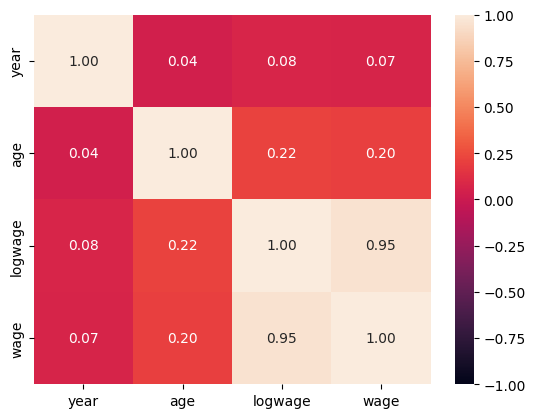

In [ ]:
sns.heatmap(wage[features].corr(), annot = True, vmin  = -1, vmax = + 1, fmt = '.2f', color = 'darkgray')

In [ ]:
# Doesn't look like year and age are strongly correlated to wage
# Log Wage feels like cheating so we will not investiage it since it is just the log of the wage.

In [ ]:
def makeBoxPlot(catgegorical):
  for var in categorical:
    plt.figure(figsize = (14,8))
    sns.boxplot(x = wage[var], y = wage['wage'])

    plt.title('Boxplot of Wage by {}'.format(var))
    plt.xlabel(var)
    plt.ylabel('Wage')
    plt.show()

In [ ]:
def makeViolinPlot(catgegorical):
  for var in categorical:
    plt.figure(figsize = (14,8))
    sns.violinplot(x = wage[var], y = wage['wage'])
    plt.title('Violinplot of Wage by {}'.format(var))
    plt.xlabel(var)
    plt.ylabel('Wage')
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


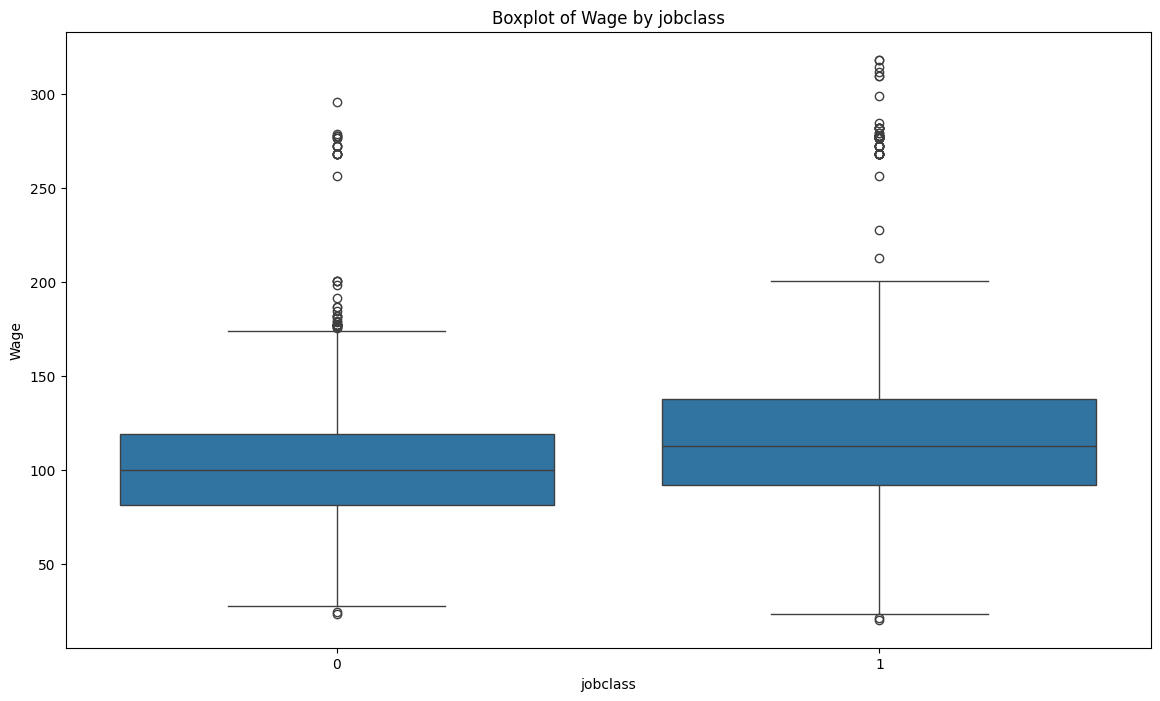

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


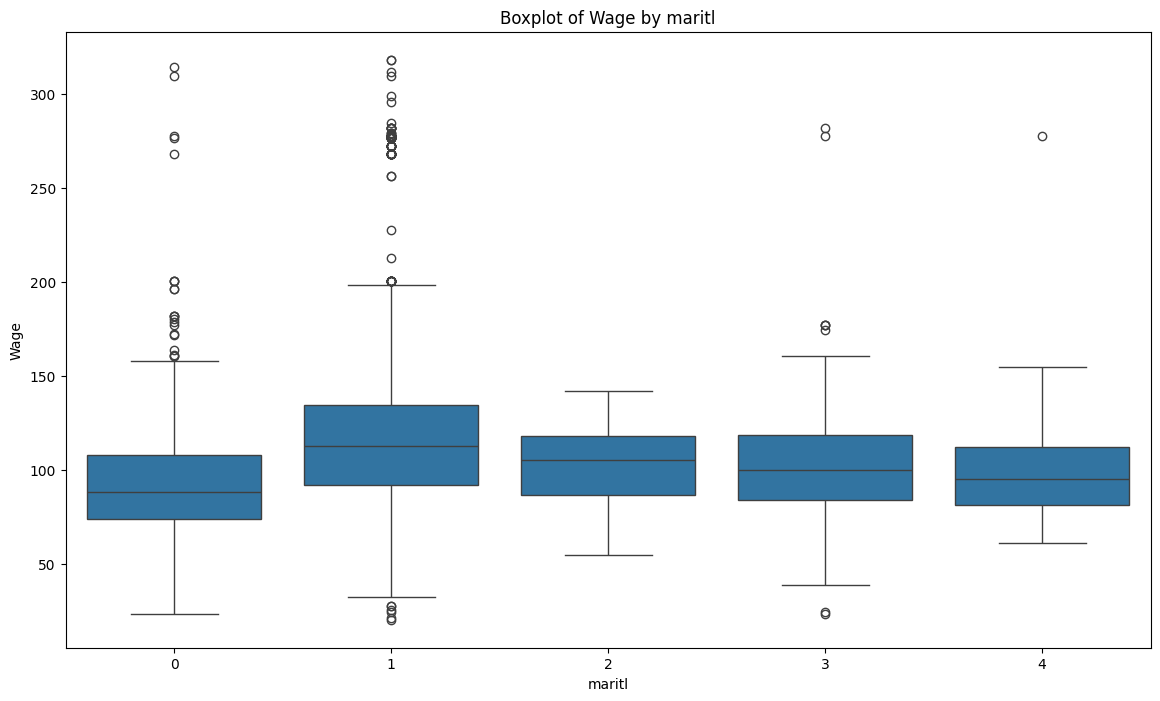

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


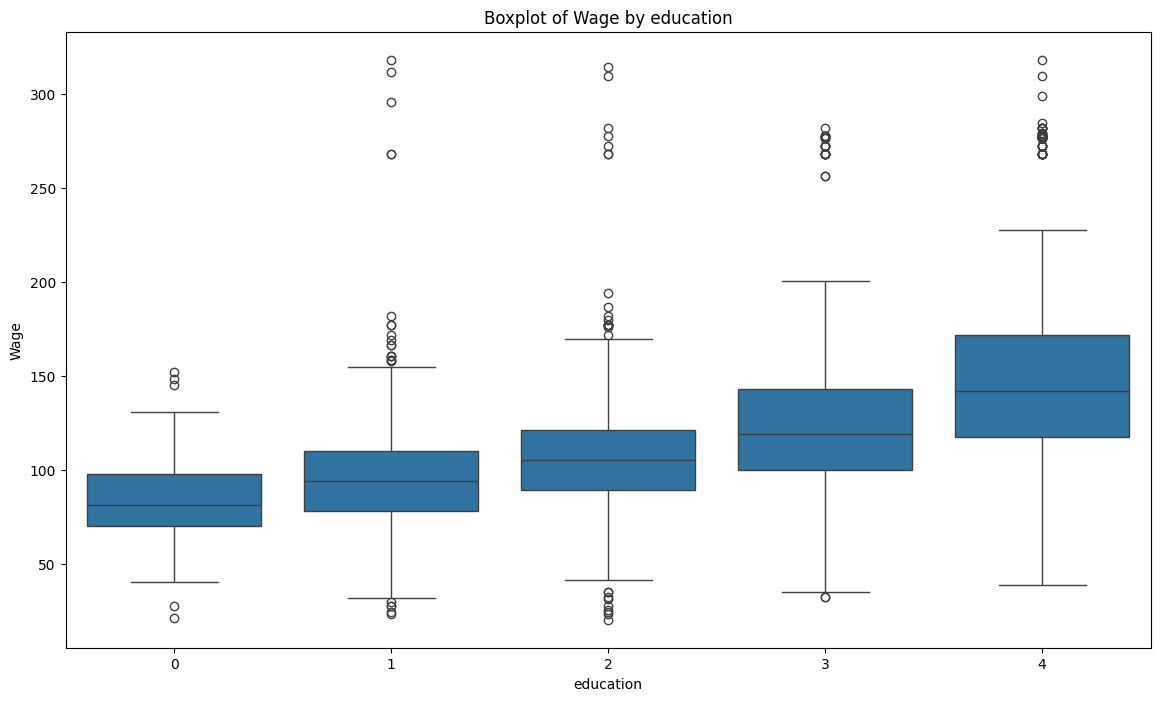

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


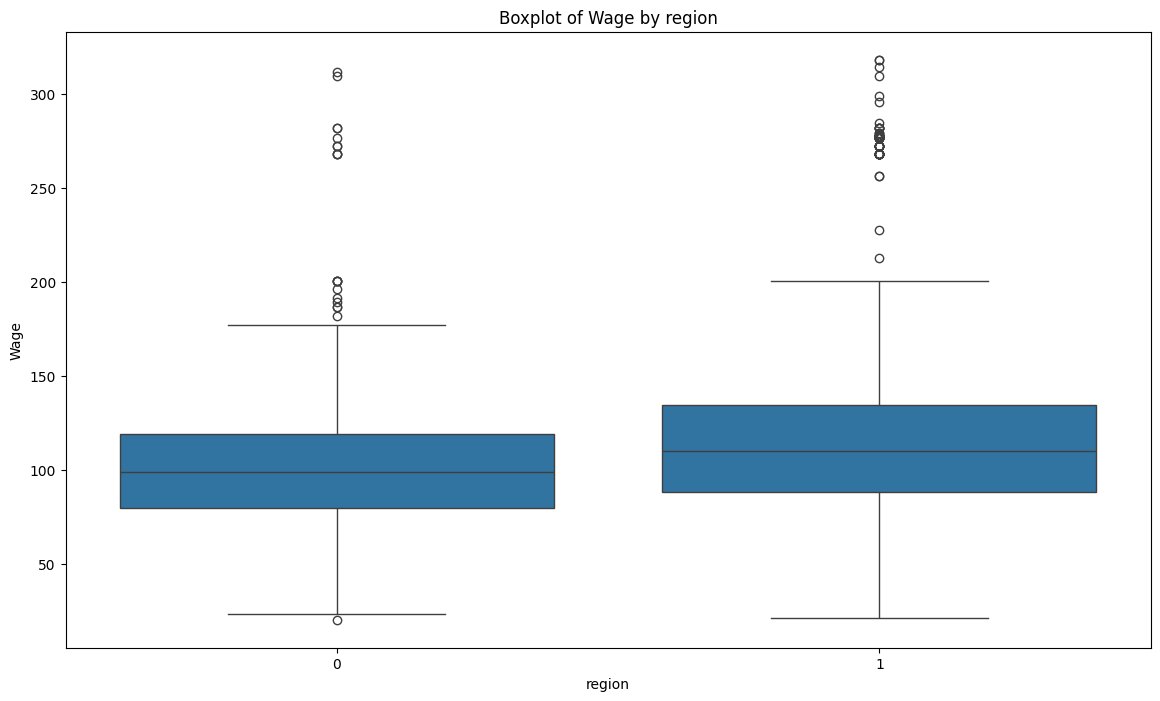

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


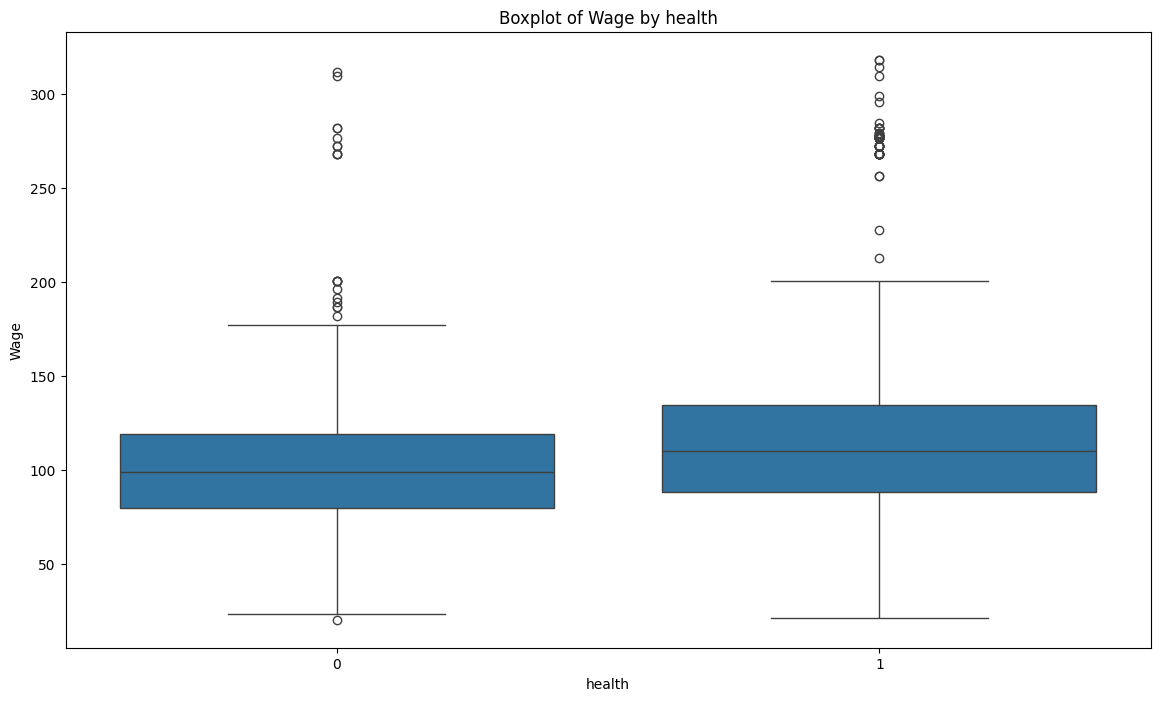

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


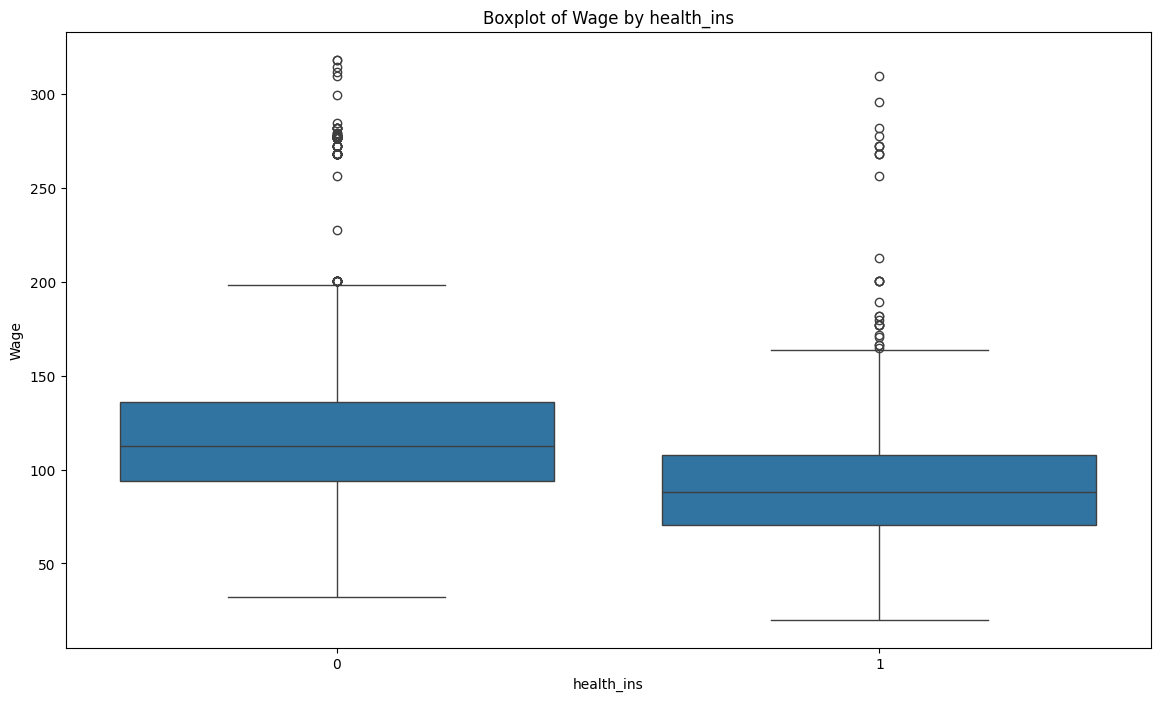

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


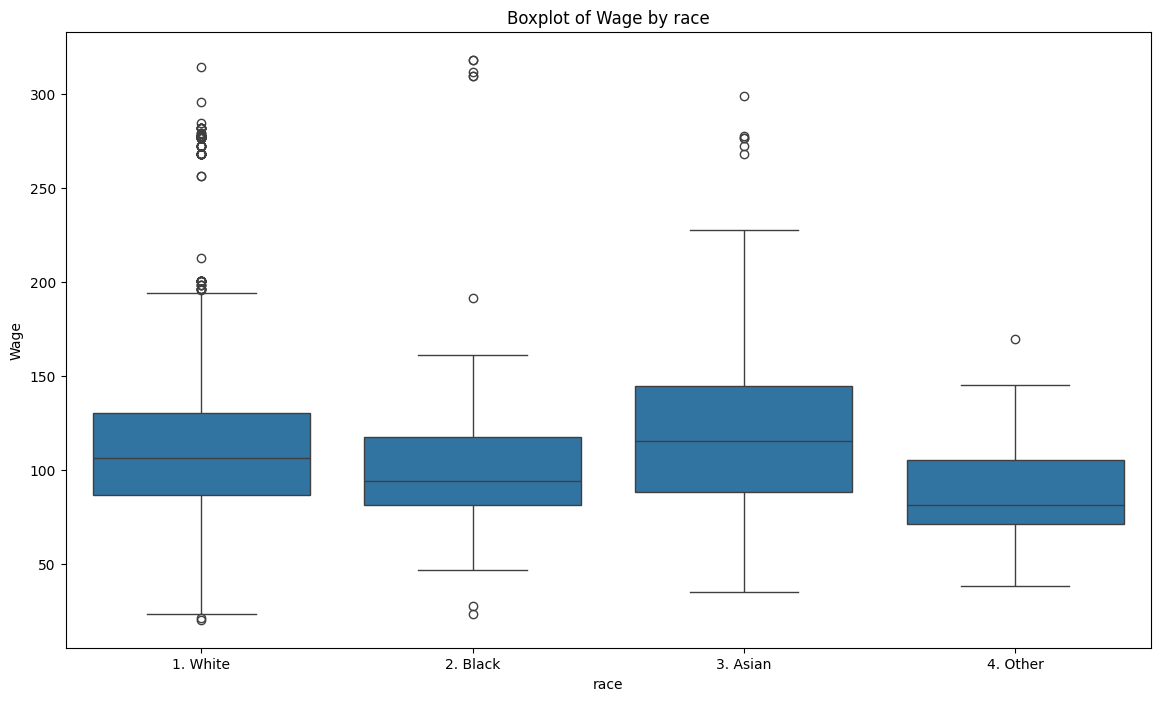

In [ ]:
akeBoxPlot(categorical)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


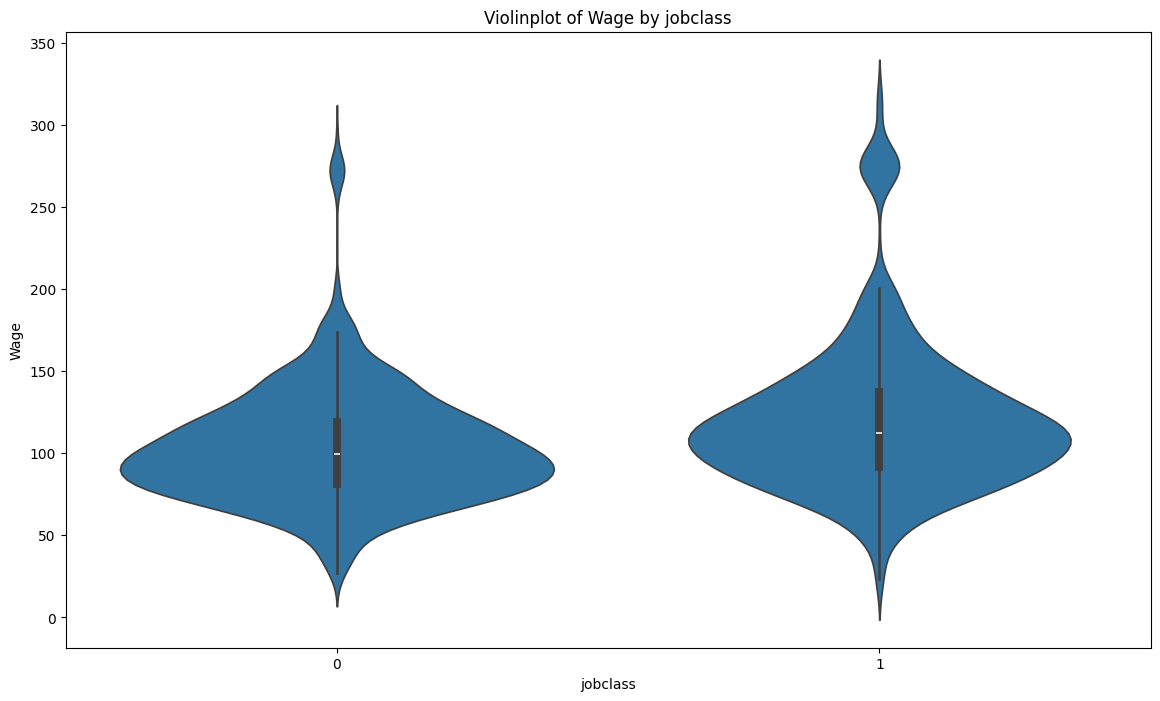

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

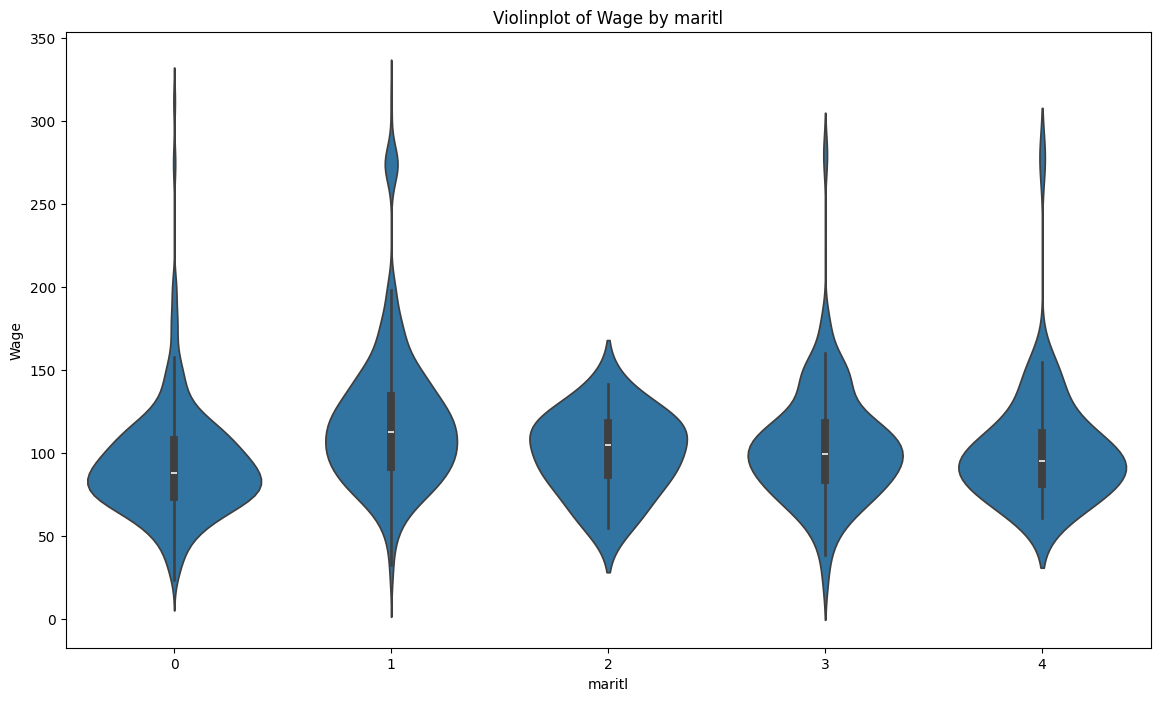

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

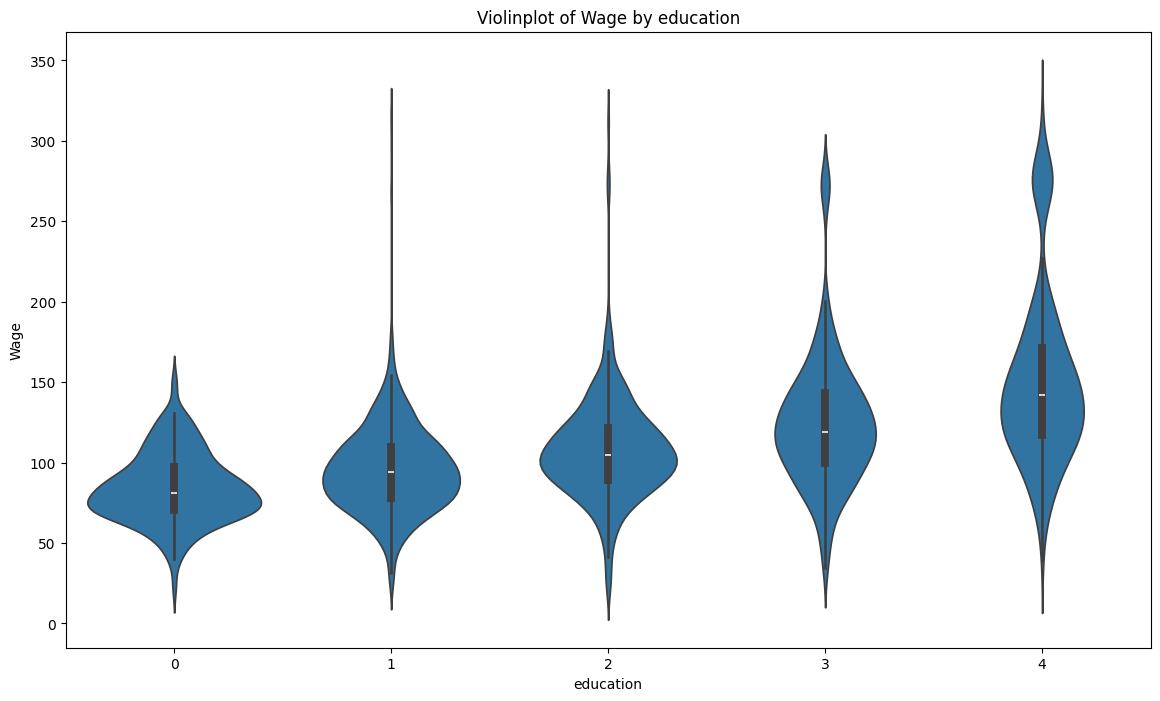

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


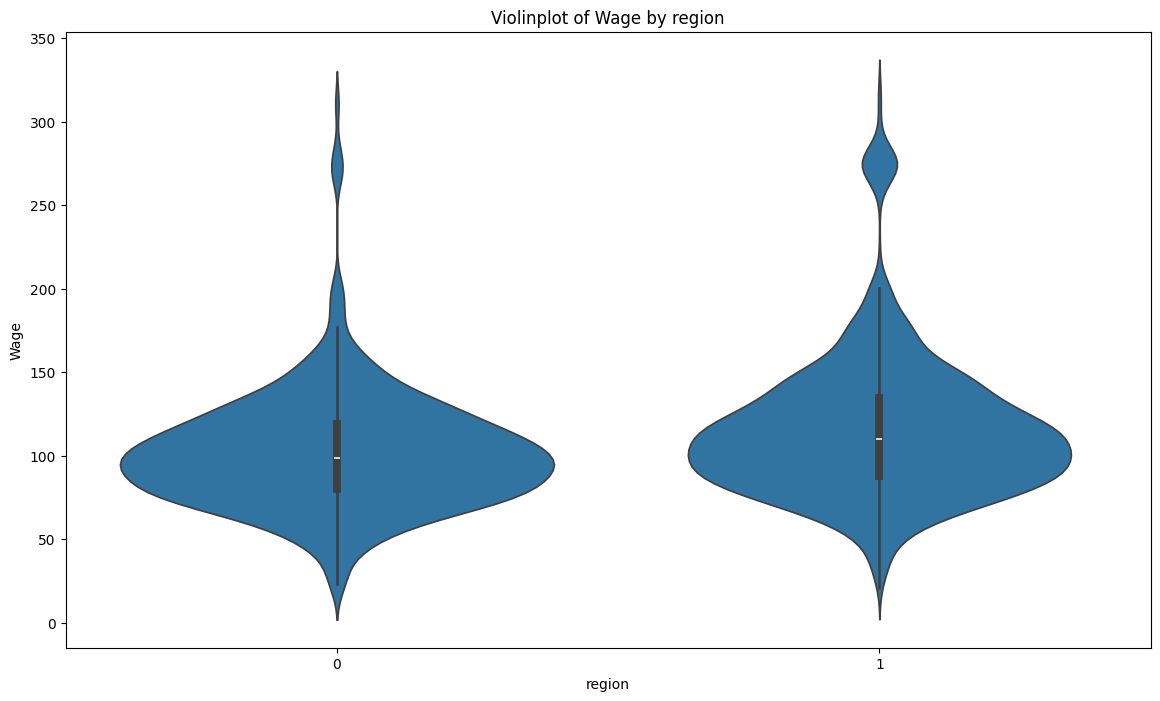

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


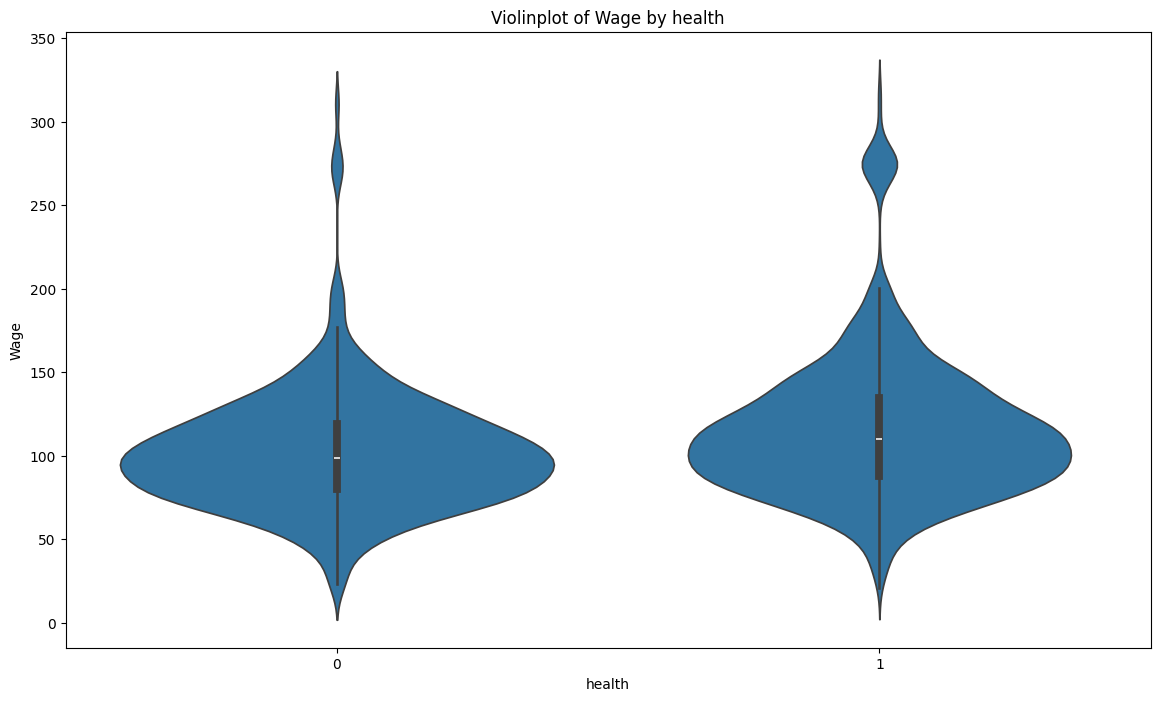

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


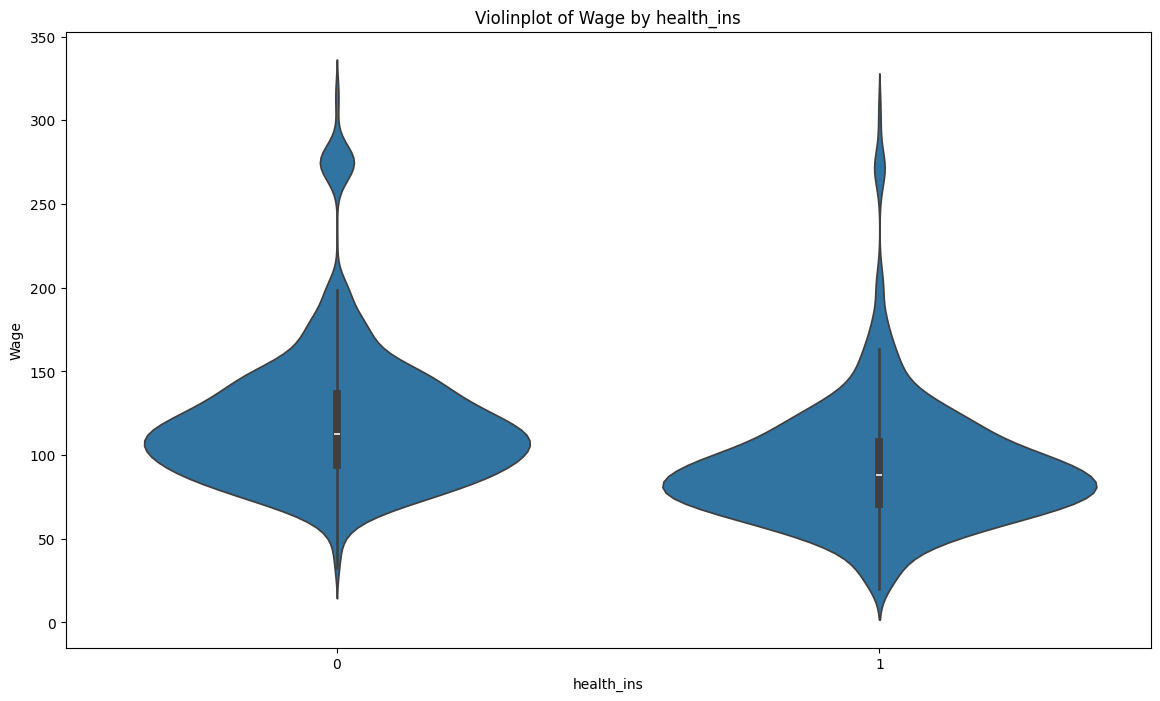

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

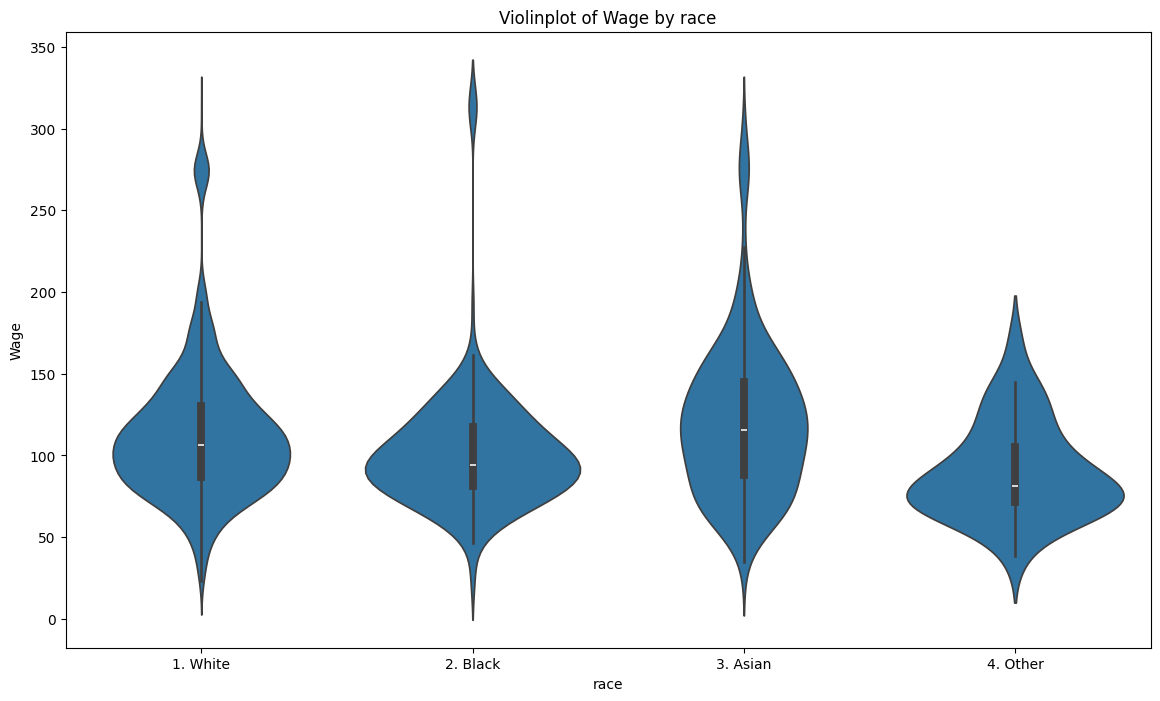

In [ ]:
makeViolinPlot(categorical)

In [ ]:
# Seems there is a strong correlation between our target and these categorical variables except with region so we will remove that one

In [ ]:
categorical.remove('region')


ValueError: list.remove(x): x not in list

In [ ]:
features.remove('wage')
features.remove('logwage')

In [ ]:
encoded_cols = sk.preprocessing.OrdinalEncoder(categories = 'auto', dtype = int, handle_unknown = 'use_encoded_value', unknown_value = -2, encoded_missing_value= -1).fit_transform(wage[categorical])

In [ ]:

for c, col in enumerate(categorical):
  wage[col] = encoded_cols[:, c]
wage.head()

year  age  maritl  race  education  region  jobclass  health  health_ins  \
0  2006   18       0     0          0       0         0       0           1   
1  2004   24       0     0          3       1         1       1           1   
2  2003   45       1     0          2       0         0       0           0   
3  2003   43       1     2          3       1         1       1           0   
4  2005   50       3     0          1       0         1       0           0   

    logwage        wage  
0  4.318063   75.043154  
1  4.255273   70.476020  
2  4.875061  130.982177  
3  5.041393  154.685293  
4  4.318063   75.043154

In [ ]:
#Baseline model is what we will make now that we have turned the categorical variables to useable data
# We have also delt with missing data
print(features, categorical)

['year', 'age'] ['jobclass', 'maritl', 'education', 'health', 'health_ins', 'race']


In [ ]:
f = 'year + cr(age, df =3) + jobclass + maritl + education + health + health_ins + race'
X_df0 = dmatrix(f, wage)
y = np.asarray(wage['wage'])

In [ ]:
model0 = sm.OLS(y, X_df0).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     157.8
Date:                Thu, 11 Jul 2024   Prob (F-statistic):          9.40e-245
Time:                        17:07:48   Log-Likelihood:                -14867.
No. Observations:                3000   AIC:                         2.975e+04
Df Residuals:                    2990   BIC:                         2.981e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1828.9019    467.520     -3.912      0.000   -2745.596    -912.208
x1             1.2507      0.311      4.025      0.000       0.641       1.860
x2          -624.1636    155.765     -4.007      0.000    -929.580    -318.747
x3          -588.8455    155.801     -3.779      0.000    -894.334    -283.357
x4          -615.8928    156.012     -3.948      0.000    -921.795    -309.991
x5             3.4056      1.330      2.560      0.011       0.797       6.014
x6            -0.0751      0.831     -0.090      0.928      -1.705       1.555
x7            13.4099      0.560     23.928      0.000      12.311      14.509
x8             7.2323      1.434      5.042      0.000       4.420      10.045
x9           -15.8510      1.425    -11.126      0.000     -18.645     -13.058
x10           -1.8650      1.007     -1.852      0.064      -3.840       0.110
==============================================================================
Omnibus:                     1159.557   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6711.943
Skew:                           1.735   Prob(JB):                         0.00
Kurtosis:                       9.454   Cond. No.                     1.39e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.21e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# Seems health and health insurance are closely related so lets combine them

In [ ]:
f = 'year + cr(age, df =3) + jobclass + maritl + education + health:health_ins + race'
data = {'year': wage['year'], 'age': wage['age'], 'jobclass' : wage['jobclass'], 'maritl': wage['maritl'],
        'education': wage['education'], 'health': wage['health'], 'health_ins': wage['health_ins'], 'race': wage['race']}
X_df1 = dmatrix(f, data)
y = np.asarray(wage['wage'])


In [ ]:
model1 = sm.OLS(y, X_df1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     159.2
Date:                Thu, 11 Jul 2024   Prob (F-statistic):          5.32e-224
Time:                        17:07:54   Log-Likelihood:                -14918.
No. Observations:                3000   AIC:                         2.985e+04
Df Residuals:                    2991   BIC:                         2.991e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1813.5179    475.412     -3.815      0.0

In [ ]:
#Check MSE for model0 and model1
pred0 = model0.predict(X_df0)
pred1 = model1.predict(X_df1)
print(np.mean((pred0 - y)**2), np.mean((pred1 - y)**2))

1180.1130141632661 1220.7520088295303


In [ ]:
# So ourbaseline will be Model0. Now we will try to fit a GAM

In [ ]:
from pygam import LinearGAM, s, f
import numpy as np
def getGAMerror(X_train, X_test, y_train, y_test, features):


  # Define the GAM model with correct term specifications
  gam_ = LinearGAM(
      s(0) +  # Smooth term for 'year'
      s(1, n_splines=4) +  # Smooth term for 'age' with 4 splines
      f(2) +  # Factor term for 'jobclass'
      f(3) +  # Factor term for 'maritl'
      f(4) +  # Factor term for 'education'
      f(5) +  # Factor term for 'health'
      f(6)    # Factor term for 'race'
  )

  # Fit the model
  gam_full = gam_.fit(X_train[features], y_train)
  pred = gam_full.predict(X_test[features])
  return np.mean((pred - y_test)**2)


In [ ]:
def getBaselinError(X_train, X_test, y_train, y_test, features):
  pred = sm.OLS(y_train, X_train[features]).fit().predict(X_test[features])
  return np.mean((pred - y_test)**2)


In [ ]:
tot_features = ['year', 'age', 'jobclass', 'maritl', 'education', 'health', 'race']
categorical_ = ['jobclass', 'maritl', 'education', 'health', 'race']

In [ ]:
encoded_cols = sk.preprocessing.OrdinalEncoder(categories = 'auto', dtype = int, handle_unknown = 'use_encoded_value', unknown_value = -2, encoded_missing_value= -1).fit_transform(wage[categorical_])

for c, cat in enumerate(categorical_):
  wage[cat] = encoded_cols[:, c]


In [ ]:
X_train, X_test, y_train, y_test = skm.train_test_split(wage[tot_features], wage['wage'], test_size = .25, random_state = 0)
X_train.columns

Index(['year', 'age', 'jobclass', 'maritl', 'education', 'health', 'race'], dtype='object')

In [ ]:
getBaselinError(X_train, X_test, y_train, y_test, tot_features)

1449.8837685416822

In [ ]:
getGAMerror(X_train, X_test, y_train, y_test, tot_features)

1368.7845233686483

### Results (7) -

We see that the GAM error is significantly less than the regular linear regression with condensed variables. This is what we expect since we are using splines which when used correctly should better predict the data. More could be done here of course, we could cross validate the splines on each feature. Then use stepwise or best subset selection to reduce the variables. OR we could use a lasso, ridge regression, PCR, PLS to eliminate further noise from variables.

## Question -8. Fit some of the non-linear models investigated in this chapter to the Auto data set. Is there evidence for non-linear relationships in this data set? Create some informative plots to justify your answer.

In [ ]:
auto = load_data('Auto')

In [ ]:
auto.head()

mpg  cylinders  displacement  horsepower  weight  \
name                                                                           
chevrolet chevelle malibu  18.0          8         307.0         130    3504   
buick skylark 320          15.0          8         350.0         165    3693   
plymouth satellite         18.0          8         318.0         150    3436   
amc rebel sst              16.0          8         304.0         150    3433   
ford torino                17.0          8         302.0         140    3449   

                           acceleration  year  origin  
name                                                   
chevrolet chevelle malibu          12.0    70       1  
buick skylark 320                  11.5    70       1  
plymouth satellite                 11.0    70       1  
amc rebel sst                      12.0    70       1  
ford torino                        10.5    70       1

In [ ]:
auto.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration        year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.000000    2.000000  
max       24.800000   82.000000    3.000000

In [ ]:
categorical = ['cylinders', 'origin']
features = ['horsepower', 'displacement', 'weight', 'acceleration']
target = 'mpg'

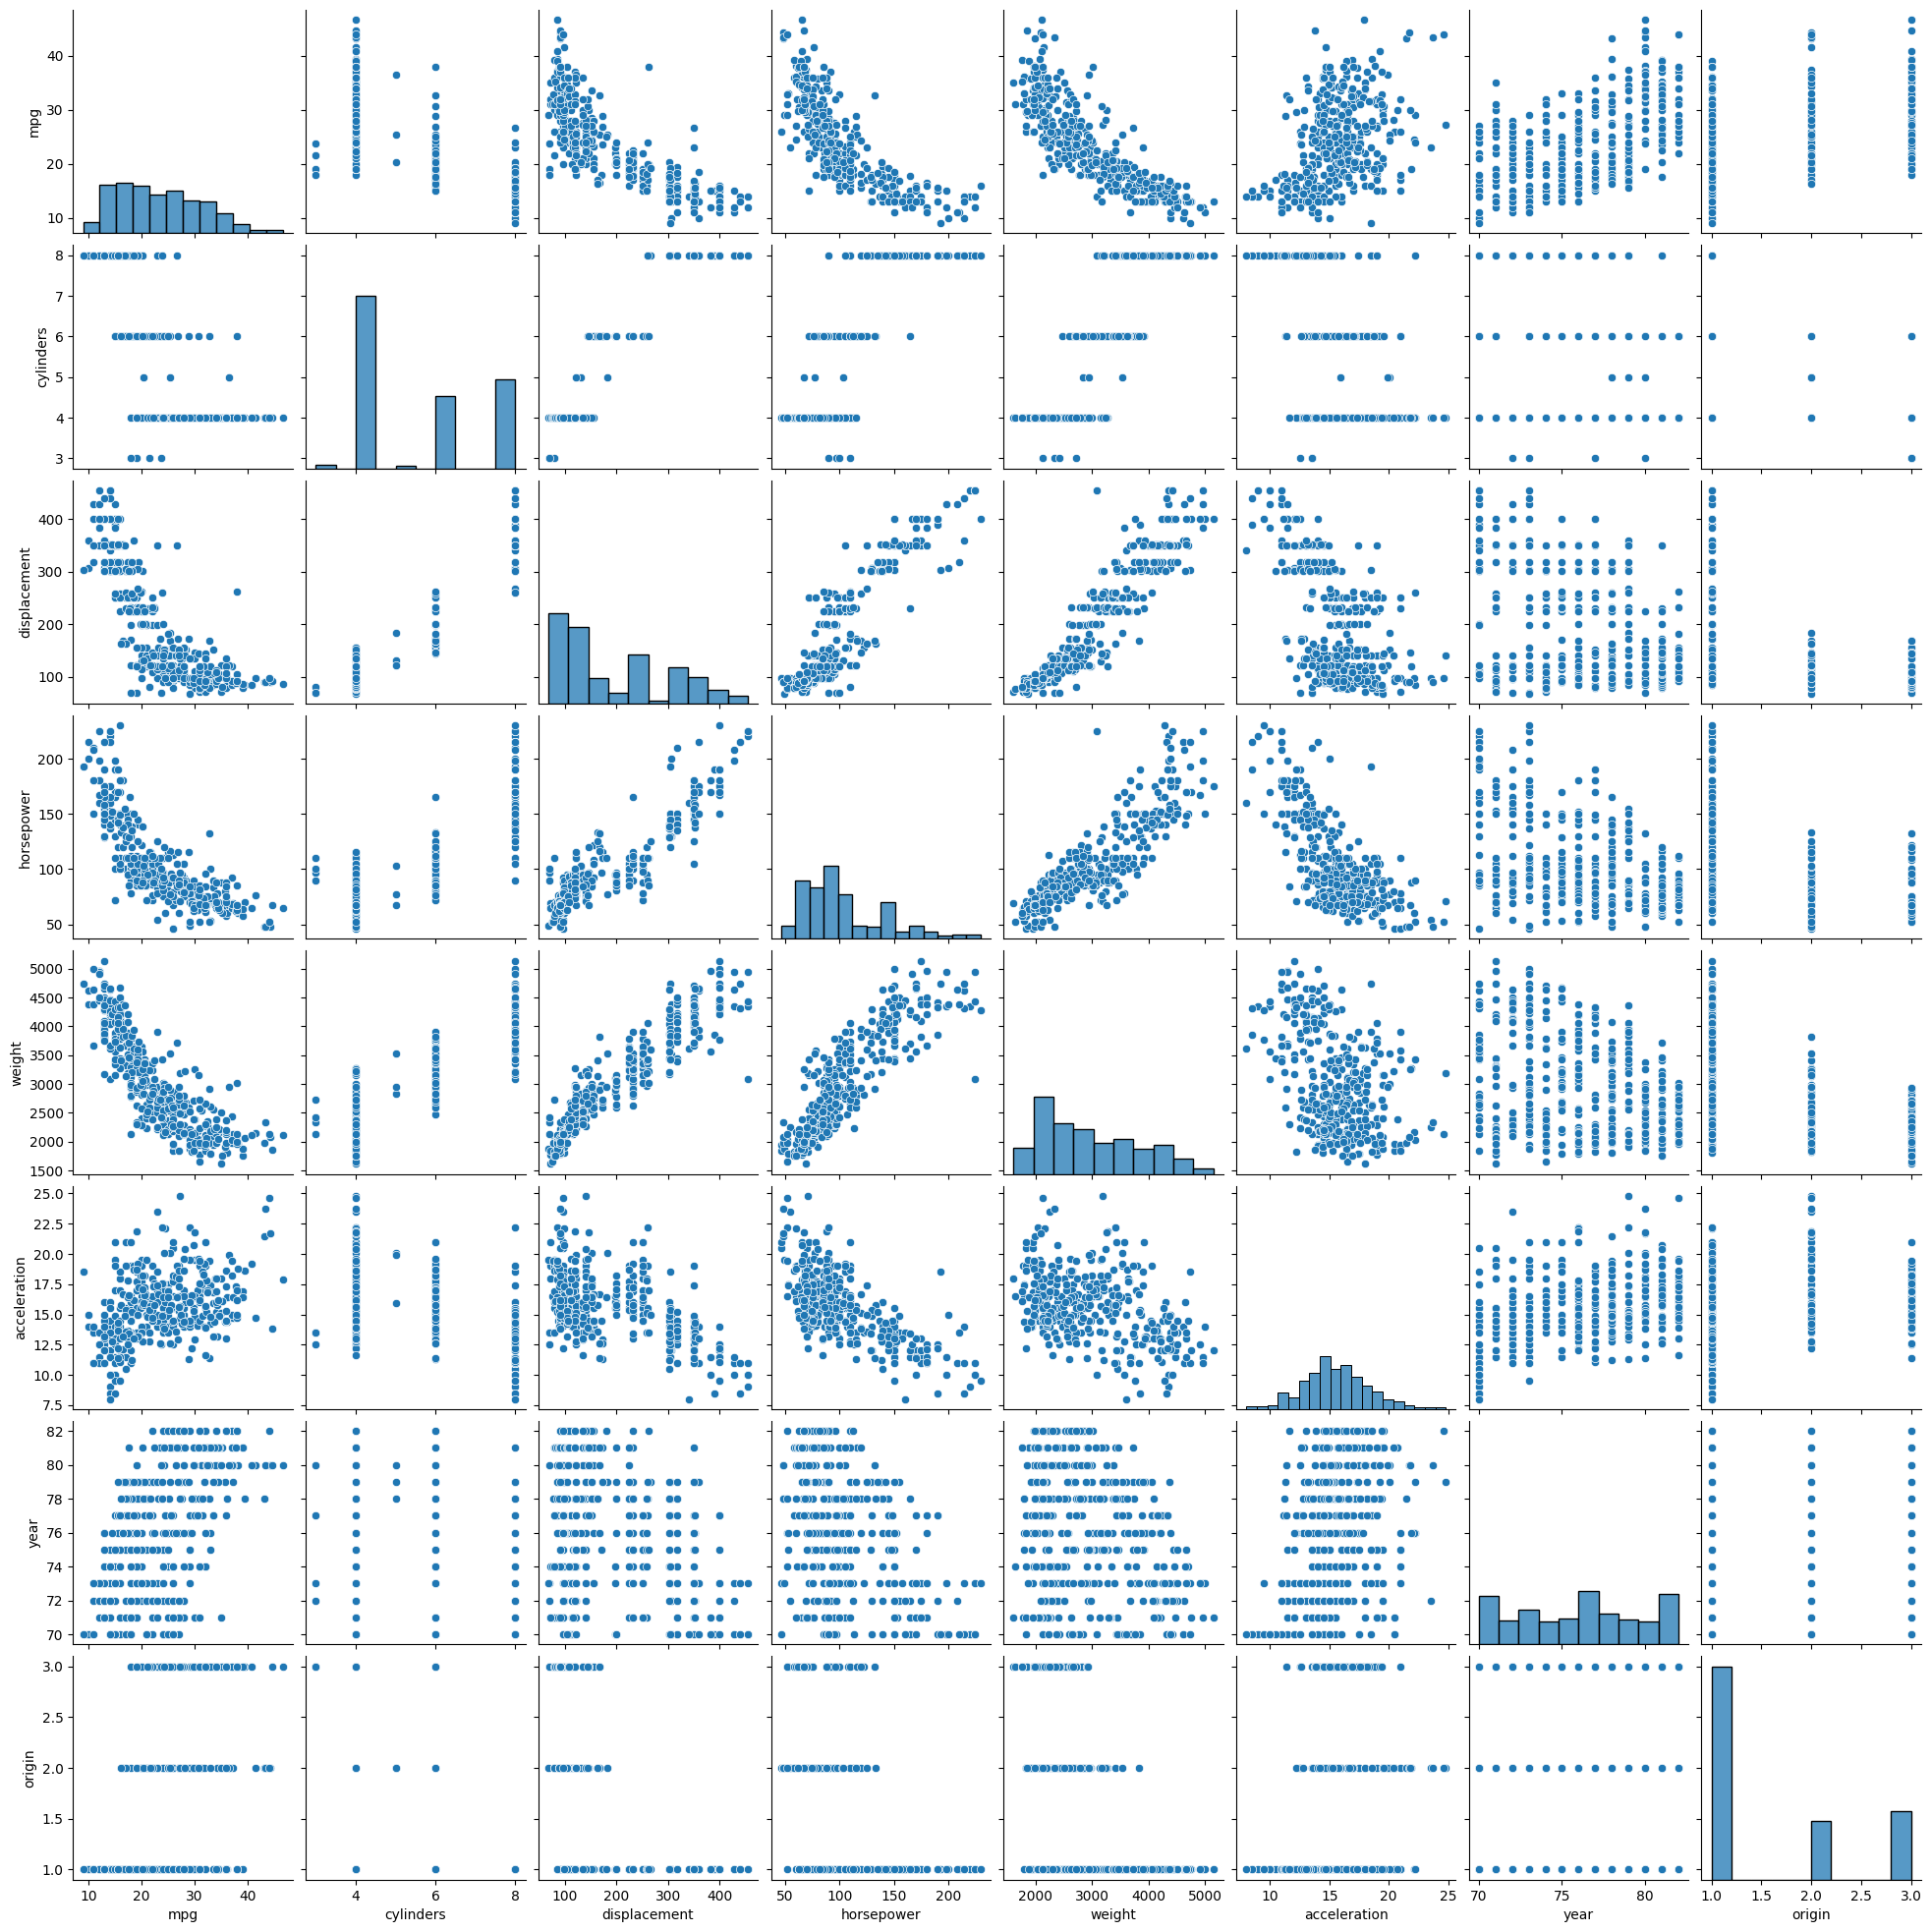

In [ ]:
sns.pairplot(auto)

In [ ]:
# Looks like there could be a non linear relationship with weight, horsepower, acceleration, and cylinders.
# We will use a step function for cylinders as it looks like that
# WE will use splines for weight, horsepower, and acceleration

In [ ]:
X_train, X_test, y_train , y_test = skm.train_test_split(auto['cylinders'], auto[target], test_size = .2, random_state = 0)

In [ ]:
errors = stepFunction(X_train, y_train, X_test, y_test, 15)

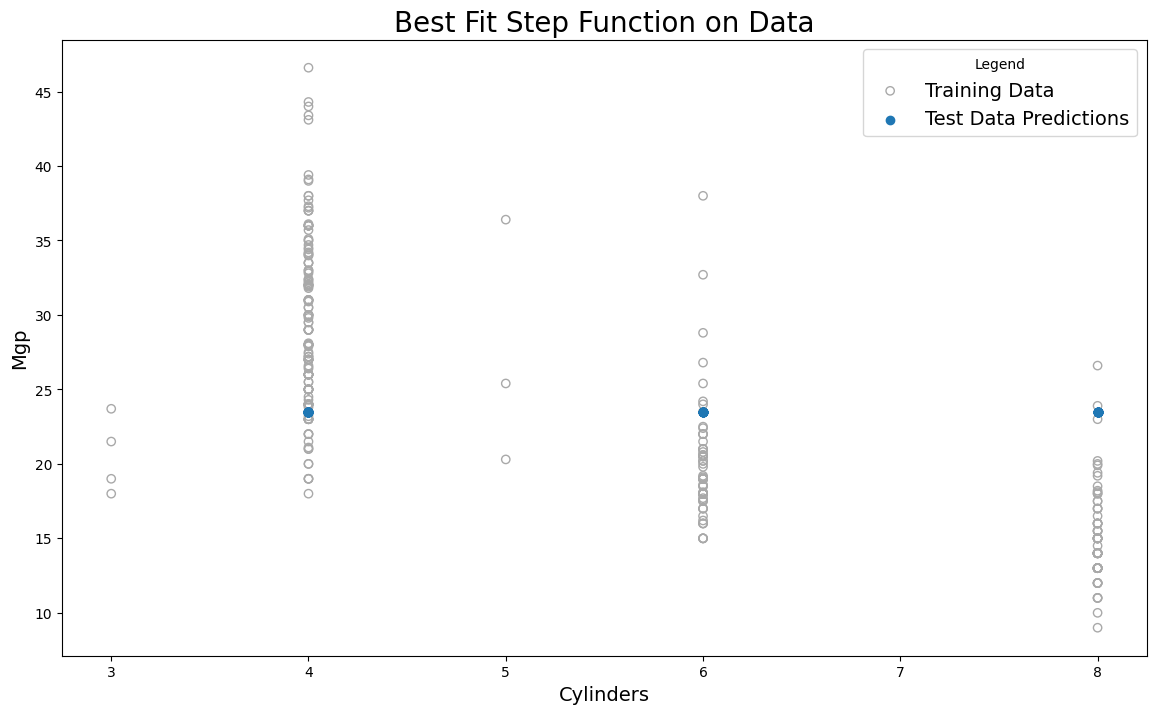

In [ ]:
xName, yName = 'Cylinders', 'Mgp'
min_step = np.argmin(errors, axis = 0)
stepCutPlot(X_train, y_train, X_test, y_test, min_step, xName, yName)


In [ ]:
X_train, X_test, y_train , y_test = skm.train_test_split(auto['acceleration'], auto[target], test_size = .2, random_state = 0)

In [ ]:
errors = polyCrossValidation(X_train, y_train, 15)
np.argmin(errors)

3

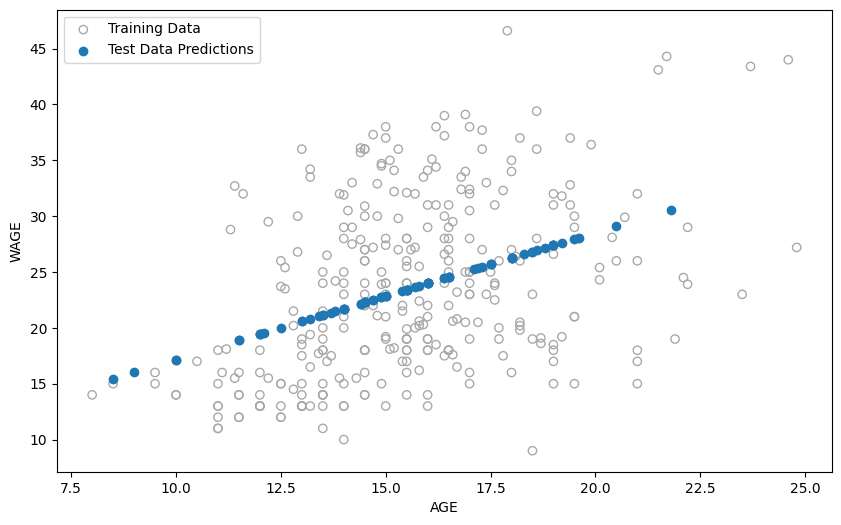

In [ ]:
polyDegreePlot(X_train, y_train, X_test, y_test, np.argmin(errors))
#Polynomial of degree 3 so indeed nonlinear gives the least error

In [ ]:
X_train, X_test, y_train , y_test = skm.train_test_split(auto['weight'], auto[target], test_size = .2, random_state = 0)

In [ ]:
X_train.min(), X_train.max()

(1613, 5140)

In [ ]:
X_test.min(), X_test.max()

(1773, 4997)

In [ ]:
bs_ = BSpline(internal_knots = [2000,3000,4000,5000], intercept = True).fit_transform(X_train)
bs_test = BSpline(internal_knots = [2000,3000,4000, 4500], intercept = True).fit_transform(X_test)
bs_.shape, y_train.shape, bs_test.shape, y_test.shape

((313, 8), (313,), (79, 8), (79,))

In [ ]:
model = sm.OLS(y_train, bs_).fit()
pred = model.predict(bs_test)
score = np.mean((pred - y_test)**2)
score

19.974136942000957

In [ ]:
bs_.shape

(313, 8)

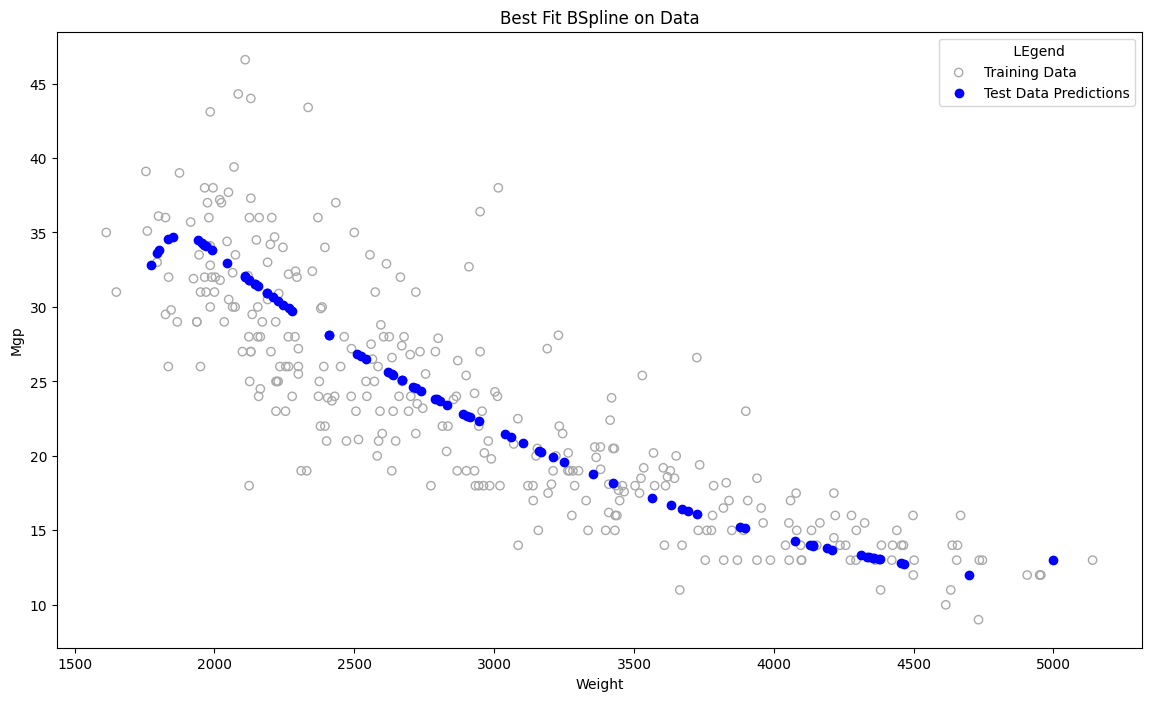

In [ ]:
plt.figure(figsize = (14,8))
plt.scatter(X_train, y_train, facecolors = 'none', edgecolors = 'darkgray', label = 'Training Data')
plt.scatter(X_test, pred, label = 'Test Data Predictions', color = 'blue')
plt.xlabel('Weight')
plt.ylabel('Mgp')
plt.legend(title = ' LEgend')
plt.title('Best Fit BSpline on Data')
plt.show()

In [ ]:
#NonLinear relationship explained using Bspline

In [ ]:
X_train, X_test, y_train , y_test = skm.train_test_split(auto['horsepower'], auto[target], test_size = .2, random_state = 0)

In [ ]:
ns_horse = NaturalSpline(df=4).fit_transform(X_train)
ns_horse_test = NaturalSpline(df=4).fit_transform(X_test)

model = sm.OLS(y_train, ns_horse).fit()
pred = model.predict(ns_horse_test)
score = np.mean((pred - y_test)**2)
score

65.57833371647342

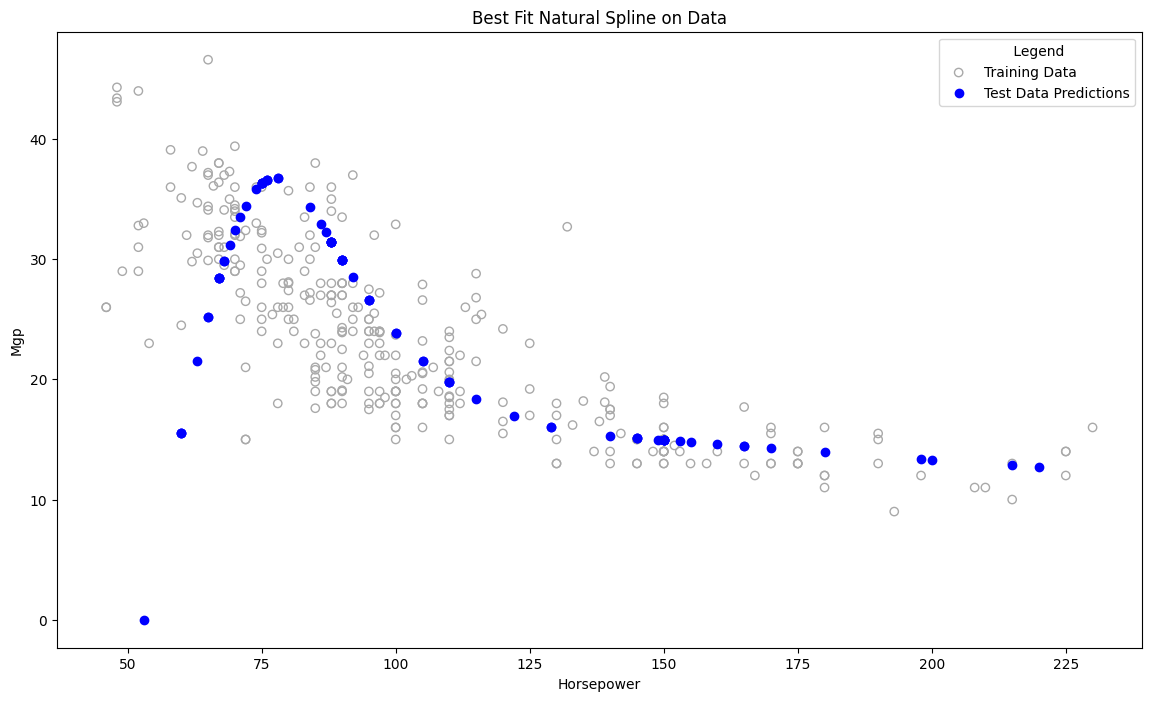

In [ ]:
plt.figure(figsize = (14,8))
plt.scatter(X_train, y_train, facecolors = 'none', edgecolors = 'darkgray', label = 'Training Data')
plt.scatter(X_test, pred, label = 'Test Data Predictions', color = 'blue')
plt.xlabel('Horsepower')
plt.ylabel('Mgp')
plt.legend(title = ' Legend')
plt.title('Best Fit Natural Spline on Data')
plt.show()

In [ ]:
# The last non-line relationship explained. This time we used a natural spline and as you can see it is not linear.

## Question 9. This question uses the variables $dis$ (the weighted mean of distances to five Boston employment centers) and $nox$ (nitrogen oxides concentration in parts per 10 million) from the Boston data. We will treat $dis$ as the predictor and $nox$ as the response.

### (a) Use the poly() function from the ISLP.models module to fit a cubic polynomial regression to predict $nox$ using $dis$. Report the regression output, and plot the resulting data and polynomial fits.

In [3]:
Boston = load_data('Boston')

In [5]:
predictor = 'dis'
response = 'nox'
X_train, X_test, y_train, y_test = skm.train_test_split(Boston[predictor], Boston[response], test_size = .2, random_state = 0)

In [65]:
def polyCrossVal(X_train, X_test, y_train, y_test, maxDegree):
  scores = np.array([])
  for i in range(1, 10 + 1):
    poly = PolynomialFeatures(degree = i)
    poly_train = poly.fit_transform(X_train.to_frame())
    lr = LinearRegression()
    #Find the optimal folds for cross validation:
    cv = np.array([])
    for j in range(2, 11):
      cv_val = cross_val_score(lr, poly_train, y_train, scoring = 'neg_mean_squared_error', cv = j)
      cv = np.append(cv,-np.mean(cv_val))
    scores = np.append(scores, np.min(cv))
  choice = np.argmin(scores) + 1
  poly = PolynomialFeatures(degree = choice)
  poly_train = poly.fit_transform(X_train.to_frame())
  lr = LinearRegression()
  lr.fit(poly_train, y_train)
  poly_test = poly.fit_transform(X_test.to_frame())
  pred = lr.predict(poly_test)
  mse = np.mean((pred- y_test)** 2)
  print('MSE ' + str(mse) + ' with ' + str(choice) + ' polynomial degree')
  plt.figure(figsize = (14,8))
  plt.scatter(X_train, y_train, facecolors = 'none', edgecolors = 'darkgray', label = 'Training Data')
  plt.scatter(X_test, pred, label = 'Best Model Test Data', color = 'blue')
  plt.xlabel('Dis', fontsize = 20)
  plt.ylabel('Nox', fontsize = 20)
  plt.title('Best Fit Polynomial on Data', fontsize = 25)
  plt.legend(title = 'Legend', fontsize = 14)
  plt.show()

MSE 0.0045039023053632995 with 3 polynomial degree


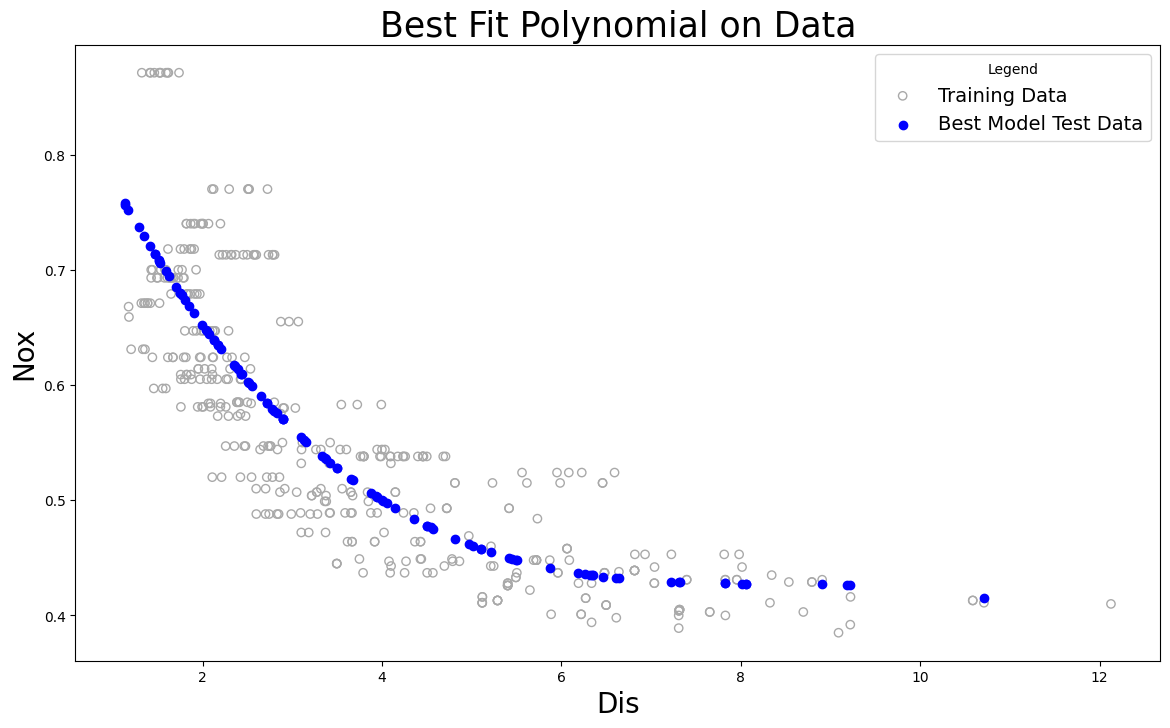

In [66]:
polyCrossVal(X_train, X_test, y_train , y_test, 5)

### (b) Plot the polynomial fts for a range of diferent polynomial degrees (say, from 1 to 10), and report the associated residual sum of squares.

#### Results - (b)

* In the above exmaple I created a function that found the most optimal polynomial based on the minimum residual sum of squares. I didn't graph each polynomial. However, I created a model for each polynomial and trained it using cross validation and determined its error. The smallest error was a degree 3 polynomial.

### (c) Perform cross-validation or another approach to select the optimal degree for the polynomial, and explain your results.

#### Results - (c)

* I used cross val score which utilizes kfold for cross validation. I tried folds between 2 - 10 as the most optimal folds are usually 5 and 10. It then scores it on each set of folds so we take the average of all of those. Since it is a min function it returns a negative value, hence -np.mean(). I then iterated through 10 degrees of polynomials and took the min of all 10. Degree 3 was the smallest.

### (d) Use the bs() function from the ISLP.models module to fit a regression spline to predict nox using dis. Report the output for the fit using four degrees of freedom. How did you choose the knots? Plot the resulting ft.

In [67]:
X_train.min(), X_train.max()

(1.1742, 12.1265)

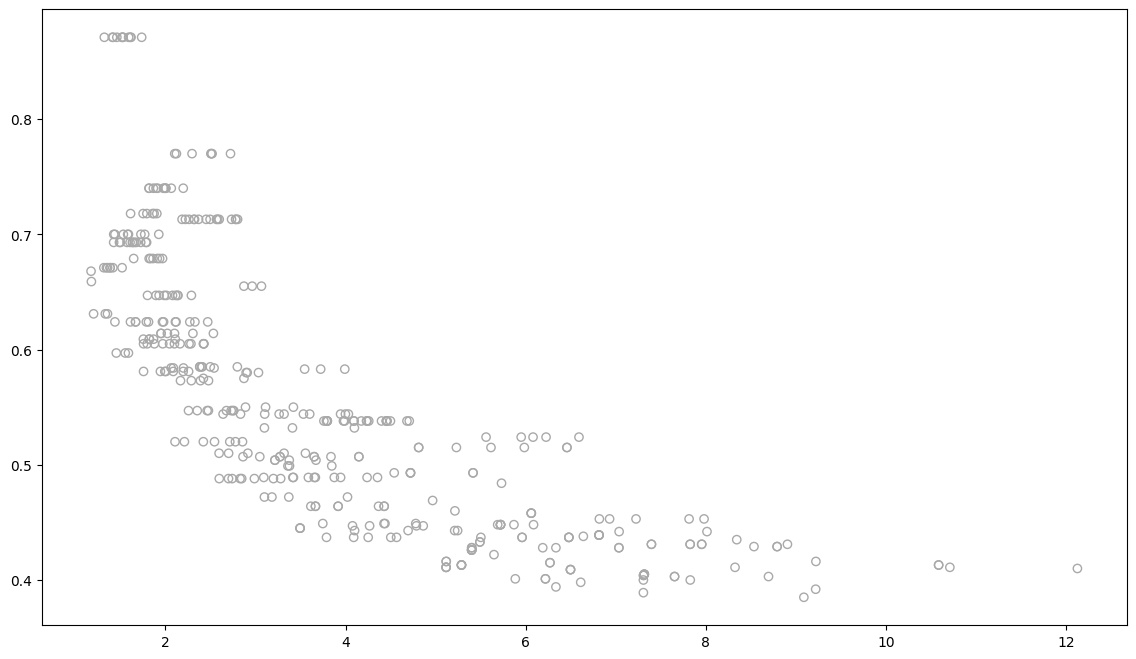

In [68]:
plt.figure(figsize = (14,8))
plt.scatter(X_train, y_train, facecolors = 'none', edgecolors = 'darkgray', label = 'Training Data')

In [69]:
#Looking at the graphs and different options for changes in piecewise, polynomial functions. I would say
#knot at 2,4,6,8,10

(102, 9) (404,)
5 degrees of freedom                              OLS Regression Results                            
Dep. Variable:                    nox   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     135.0
Date:                Fri, 12 Jul 2024   Prob (F-statistic):          5.06e-108
Time:                        15:25:01   Log-Likelihood:                 566.48
No. Observations:                 404   AIC:                            -1115.
Df Residuals:                     395   BIC:                            -1079.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                                                                                   coef    std err          t      P>|t|      [0.025      0.

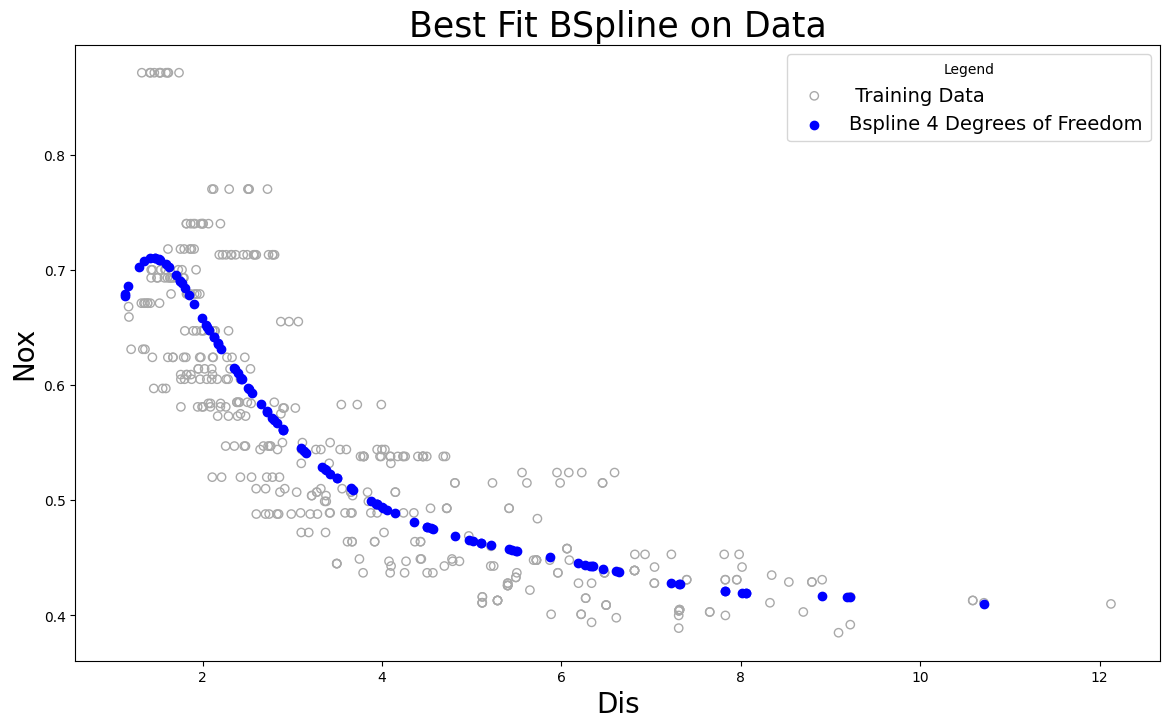

In [74]:
bSpline_train_5 = BSpline(internal_knots = [2,4,6,8,10], intercept = True).fit_transform(X_train)
bSpline_train_4 = BSpline(internal_knots = [2,6,8,10], intercept  = True).fit_transform(X_train)
bSpline_test_5 = BSpline(internal_knots = [2,4,6,8,10], intercept = True).fit_transform(X_test)
BSpline_test_4 = BSpline(internal_knots = [2,6,8,10], intercept = True).fit_transform(X_test)

print(bSpline_test_5.shape, y_train.shape)

model5 = sm.OLS(y_train, bSpline_train_5).fit()
model4 = sm.OLS(y_train, bSpline_train_4).fit()
pred4 = model4.predict(BSpline_test_4)
print("5 degrees of freedom ", model5.summary())
print('4 degreees of freeedom ', model4.summary())

plt.figure(figsize = (14,8))
plt.scatter(X_train, y_train, facecolors = 'none', edgecolor = 'darkgray', label = ' Training Data')
plt.scatter(X_test, pred4, color = 'blue', label = 'Bspline 4 Degrees of Freedom')
plt.xlabel('Dis', fontsize = 20)
plt.ylabel('Nox', fontsize = 20)
plt.title('Best Fit BSpline on Data', fontsize = 25)
plt.legend(title = 'Legend', fontsize = 14)
plt.show()


In [71]:
#Both models have the same R**2 and have solid p values for all the knots. So we will go with the less predictor model
# We will go for this model based on the bias - variance trade off.

### (e) Now ft a regression spline for a range of degrees of freedom, and plot the resulting fts and report the resulting RSS. Describe the results obtained.

### (f) Perform cross-validation or another approach in order to select the best degrees of freedom for a regression spline on this data. Describe your results.

In [89]:
def bSplineCV(X_train, X_test, y_train ,y_test, maxDegree):
  mse_scores = np.array([])
  for i in range(2, maxDegree):
    alpha = np.linspace(X_train.min(), X_train.max(), i)
    beta = np.linspace(X_test.min(), X_test.max(), i)
    bSpline_train = BSpline(internal_knots = alpha, intercept = True).fit_transform(X_train)
    cv_scores = np.array([])
    for j in range(2, 11):
      cv_score = cross_val_score(LinearRegression(), bSpline_train, y_train, scoring = 'neg_mean_squared_error', cv = j)
      cv_score = np.append(cv_score, -np.mean(cv_score))
    mse_scores = np.append(mse_scores, np.min(cv_score))
  best_knots = np.argmin(mse_scores) + 2
  print('Best Knots ' + str(best_knots))
  bSpline_train = BSpline(internal_knots = np.linspace(max(X_test.min(), X_train.min()), X_test.max(), best_knots), upper_bound = min(X_test.max(), X_train.max()), lower_bound = max(X_test.min(), X_train.min()), intercept = True).fit_transform(X_train)
  bSpline_test = BSpline(internal_knots = np.linspace(max(X_test.min(), X_train.min()), X_test.max(), best_knots ), upper_bound = min(X_test.max(), X_train.max()), lower_bound = max(X_test.min(), X_train.min()), intercept = True).fit_transform(X_test)
  model = LinearRegression().fit(bSpline_train, y_train)
  pred = model.predict(bSpline_test)
  mse = np.mean((pred - y_test)**2)
  print('MSE ' + str(mse))
  print(model.summary())

  plt.figure(figsize = (14,8))
  plt.scatter(X_train, y_train, facecolors = 'none', edgecolor = 'darkgray', label = 'Training Data')
  plt.scatter(X_test, pred, label ='Best Bspline', color = 'blue')
  plt.xlabel('Dis', fontsize = 20)
  plt.ylabel('Nox', fontsize = 20)
  plt.title('Best Fit BSpline on Data', fontsize = 25)
  plt.legend(title = 'Legend', fontsize = 14)
  plt.show()





Best Knots 3
MSE 0.00594576652102522


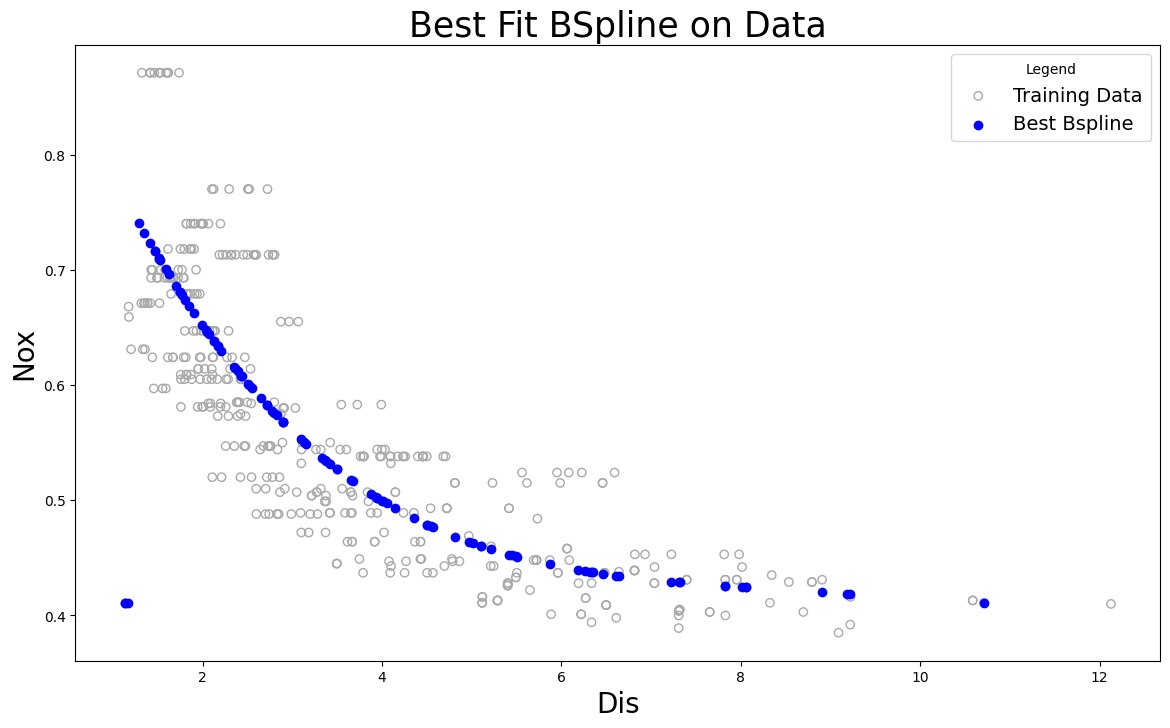

In [91]:
bSplineCV(X_train, X_test, y_train , y_test, 11)

#### Results (d),(e),(f)

* I decided to make a cross validation function using different degrees of bsplines so I can use it in the future. I used cross validation on MSE for each trained model. I think used kfolds with this on values from 2-11. The smallest error from this was added to an arry.

* I did the above from 2- MaxDegree which the user can set. I set it as 11. I think picked the best MSE from all 11 options. This happened to be 3 knots! Much like our polynomial being to the power of 3. Concidence? Idk

* I then plotted our predicted points using our best BSpline on the training data. And report our MSE!

## Question - 10. This question relates to the College data set.

### (a) Split the data into a training set and a test set. Using out-of-state tuition as the response and the other variables as the predictors, perform forward stepwise selection on the training set in order to identify a satisfactory model that uses just a subset of the predictors.

In [92]:
College = load_data('College')

In [93]:
College.head()

Private  Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
0     Yes  1660    1232     721         23         52         2885   
1     Yes  2186    1924     512         16         29         2683   
2     Yes  1428    1097     336         22         50         1036   
3     Yes   417     349     137         60         89          510   
4     Yes   193     146      55         16         44          249   

   P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  Terminal  \
0          537      7440        3300    450      2200   70        78   
1         1227     12280        6450    750      1500   29        30   
2           99     11250        3750    400      1165   53        66   
3           63     12960        5450    450       875   92        97   
4          869      7560        4120    800      1500   76        72   

   S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0       18.1           12    7041         60  
1       12.2           16   10527         56  
2       12.9           30    8735         54  
3        7.7           37   19016         59  
4       11.9            2   10922         15

In [95]:
College.shape

(777, 18)

In [97]:
College['Private'] = College['Private'].map({'Yes': 1, 'No': 0})
College.head()

Private  Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
0       1  1660    1232     721         23         52         2885   
1       1  2186    1924     512         16         29         2683   
2       1  1428    1097     336         22         50         1036   
3       1   417     349     137         60         89          510   
4       1   193     146      55         16         44          249   

   P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  Terminal  \
0          537      7440        3300    450      2200   70        78   
1         1227     12280        6450    750      1500   29        30   
2           99     11250        3750    400      1165   53        66   
3           63     12960        5450    450       875   92        97   
4          869      7560        4120    800      1500   76        72   

   S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0       18.1           12    7041         60  
1       12.2           16   10527         56  
2       12.9           30    8735         54  
3        7.7           37   19016         59  
4       11.9            2   10922         15

In [98]:
College.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [105]:
#Change College so we can use  admatrix. Cant with "."
predictors = ['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F-Undergrad', 'P-Undergrad', 'Outstate',  'Room-Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S-F-Ratio', 'perc-alumni', 'Expend',
       'Grad-Rate']
response = 'Outstate'

In [106]:
College.columns = predictors

In [107]:
#Remove out of state
predictors = ['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F-Undergrad', 'P-Undergrad','Room-Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S-F-Ratio', 'perc-alumni', 'Expend',
       'Grad-Rate']


In [108]:
X_train, X_test, y_train, y_test = skm.train_test_split(College[predictors], College[response], random_state = 0, test_size = 0.2 )

In [133]:
def forwardStepwise(X_train, X_test, y_train, y_test):
  features = []
  score_dict = {}
  remaining_features = set(col for col in X_train.columns if not col == response)
  for i in range(1,len(X_train.columns)):
    best_score, best_feature = 0, None
    for feature in remaining_features:
      X = [feature] if i == 1 else features[i-2] + [feature]
      best_cv_score = float('inf')
      for j in range(2,11):
        cv_score = cross_val_score(LinearRegression(), X_train[X], y_train,  scoring ='neg_mean_squared_error', cv = j)
        best_cv_score = min(best_cv_score, -np.mean(cv_score))
      if best_cv_score > best_score:
        best_score = best_cv_score
        best_feature = feature

    features.append(features[i-2] + [best_feature] if i!= 1 else [best_feature])
    remaining_features.remove(best_feature)
    lr = LinearRegression()
    lr.fit(X_train[features[-1]], y_train)
    pred = lr.predict(X_test[features[-1]])
    score = np.mean((pred - y_test)** 2)
    score_dict[i] = score

  plt.figure(figsize = (14,8))
  plt.plot(score_dict.keys(), score_dict.values(), marker = 'o')
  plt.xlabel('Number of Features', fontsize = 20)
  plt.ylabel('MSE', fontsize = 20)
  plt.title('Forward Stepwise Selection compared to MSE', fontsize = '20')
  return features, score_dict


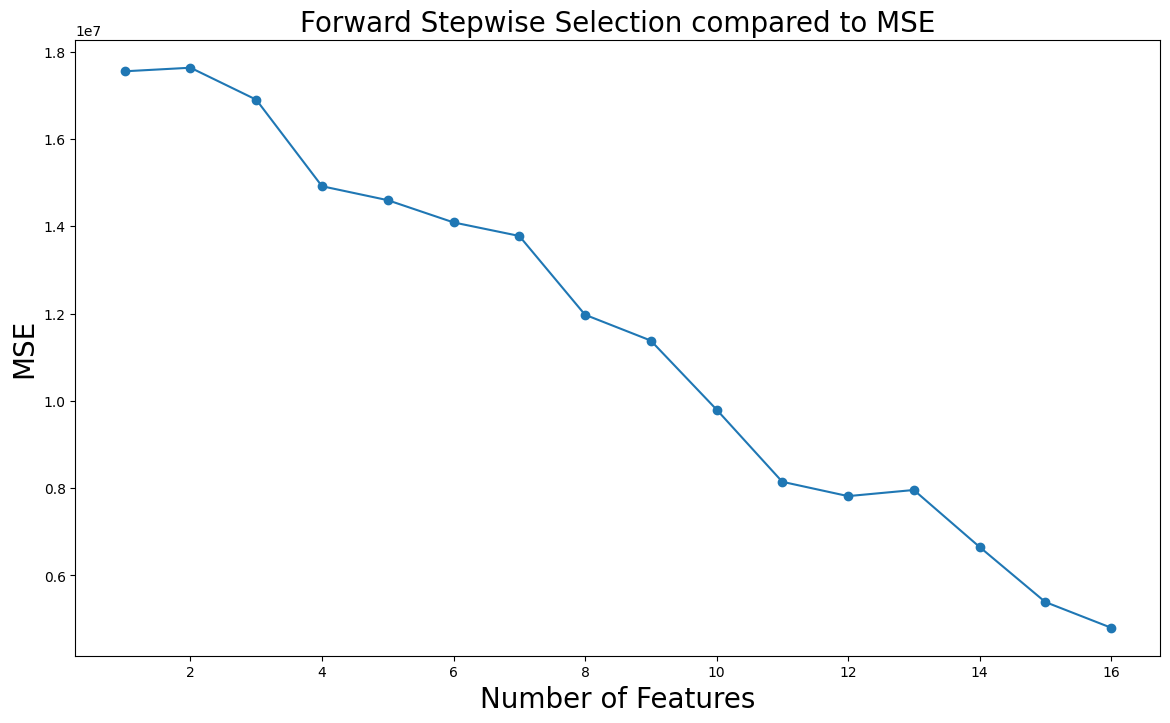

In [134]:
features, score_dict = forwardStepwise(X_train, X_test, y_train, y_test)

### (b) Fit a GAM on the training data, using out-of-state tuition as the response and the features selected in the previous step as the predictors. Plot the results, and explain your findings.

In [135]:
features

[['Accept'],
 ['Accept', 'Books'],
 ['Accept', 'Books', 'Apps'],
 ['Accept', 'Books', 'Apps', 'Enroll'],
 ['Accept', 'Books', 'Apps', 'Enroll', 'P-Undergrad'],
 ['Accept', 'Books', 'Apps', 'Enroll', 'P-Undergrad', 'F-Undergrad'],
 ['Accept',
  'Books',
  'Apps',
  'Enroll',
  'P-Undergrad',
  'F-Undergrad',
  'Personal'],
 ['Accept',
  'Books',
  'Apps',
  'Enroll',
  'P-Undergrad',
  'F-Undergrad',
  'Personal',
  'PhD'],
 ['Accept',
  'Books',
  'Apps',
  'Enroll',
  'P-Undergrad',
  'F-Undergrad',
  'Personal',
  'PhD',
  'Terminal'],
 ['Accept',
  'Books',
  'Apps',
  'Enroll',
  'P-Undergrad',
  'F-Undergrad',
  'Personal',
  'PhD',
  'Terminal',
  'Top25perc'],
 ['Accept',
  'Books',
  'Apps',
  'Enroll',
  'P-Undergrad',
  'F-Undergrad',
  'Personal',
  'PhD',
  'Terminal',
  'Top25perc',
  'Grad-Rate'],
 ['Accept',
  'Books',
  'Apps',
  'Enroll',
  'P-Undergrad',
  'F-Undergrad',
  'Personal',
  'PhD',
  'Terminal',
  'Top25perc',
  'Grad-Rate',
  'perc-alumni'],
 ['Accept',
 

In [143]:
from pygam import LinearGAM, s, f
from pygam.terms import TermList


In [154]:
def GAM(X_train, X_test, y_train, y_test, features):
  score, model = float('inf'), None
  for i in range(4, 11):
    term_list = TermList(*[s(j, n_splines = i) for j in range(len(features))])
    # Define the GAM model with correct term specifications
    gam_ = LinearGAM(terms = term_list)
    # Fit the model
    gam_full = gam_.fit(X_train[features[-1]], y_train)
    pred = gam_full.predict(X_test[features[-1]])
    tmp_score = np.mean((pred - y_test)**2)
    if score > tmp_score:
      score = tmp_score
      model = gam_full
  print('Best_MSE ' + str(score))
  return model, score



In [155]:
best_model, score = GAM(X_train, X_test, y_train, y_test, features)

Best_MSE 3871292.15486704


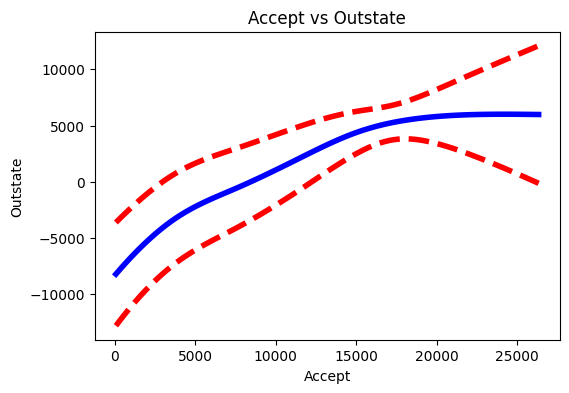

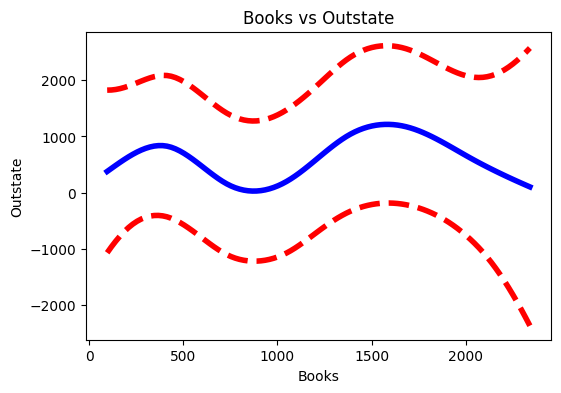

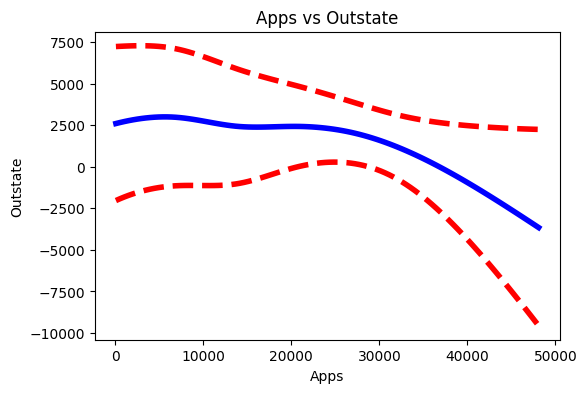

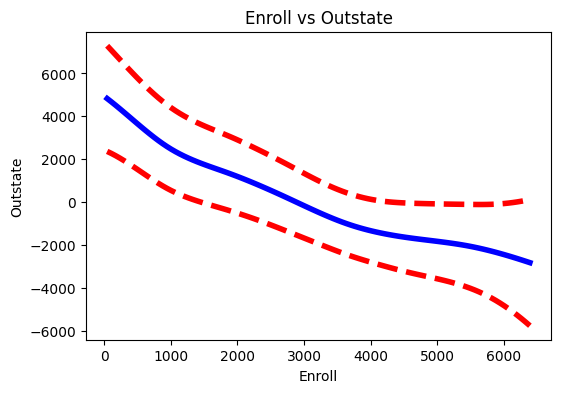

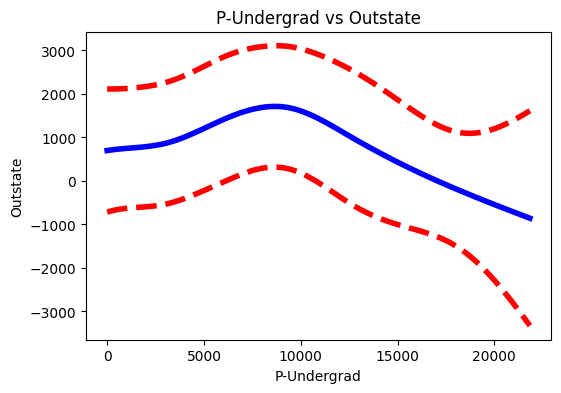

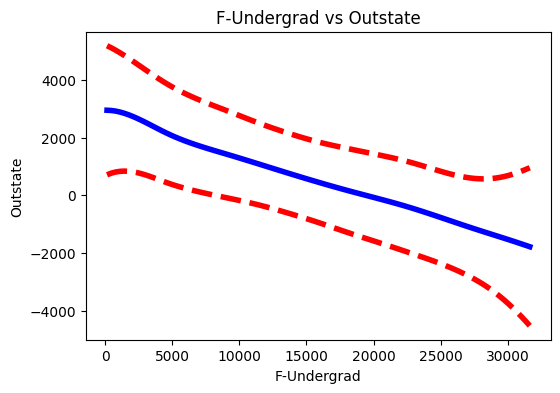

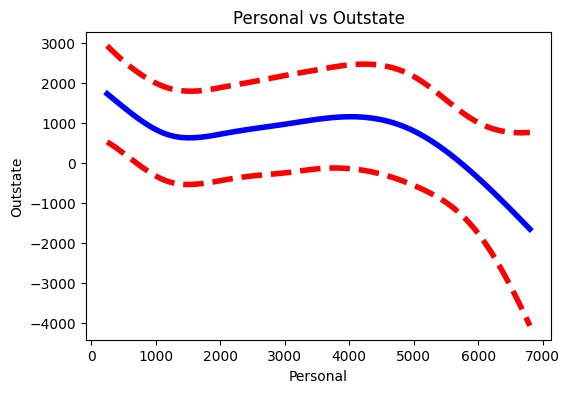

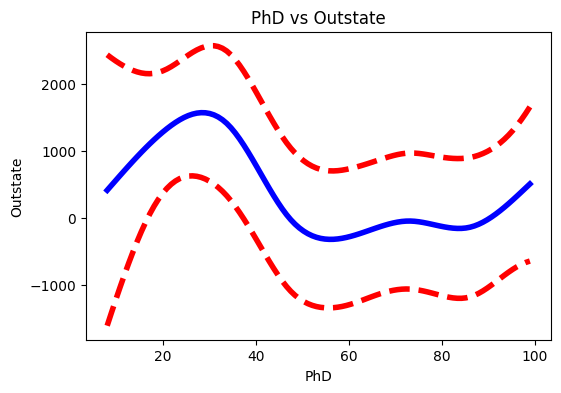

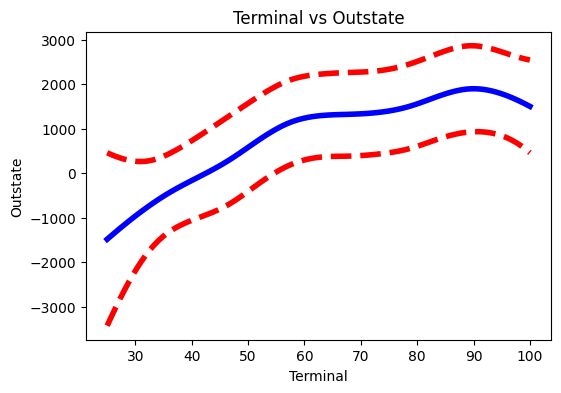

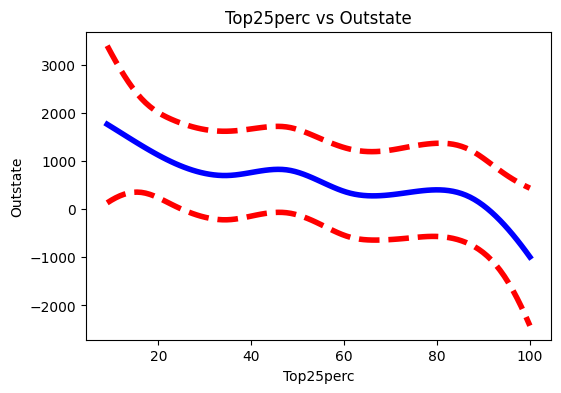

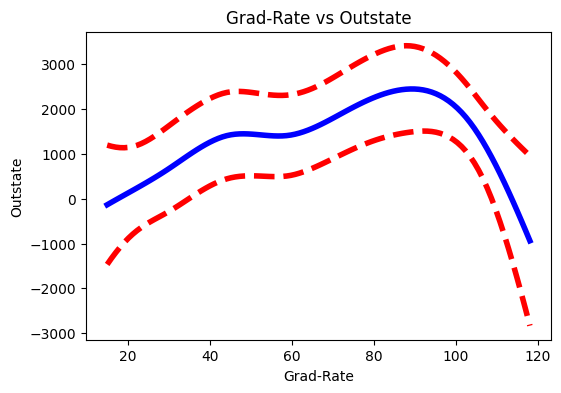

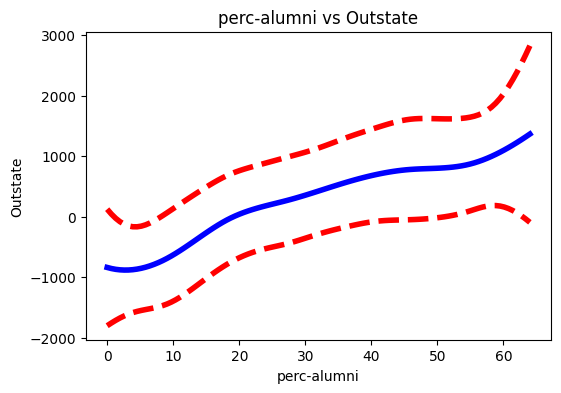

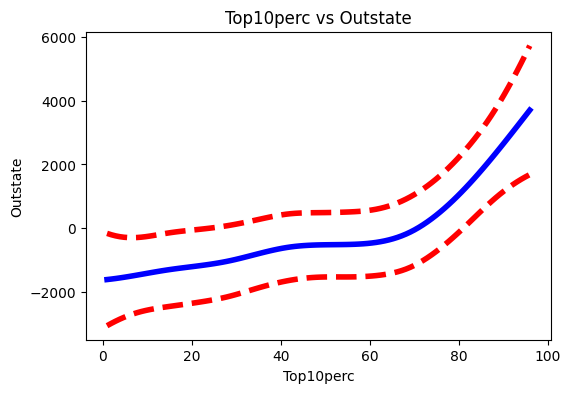

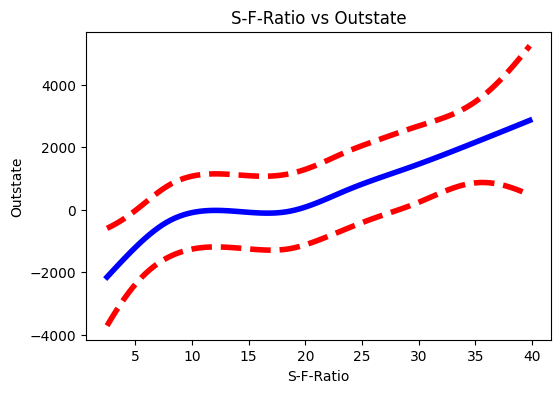

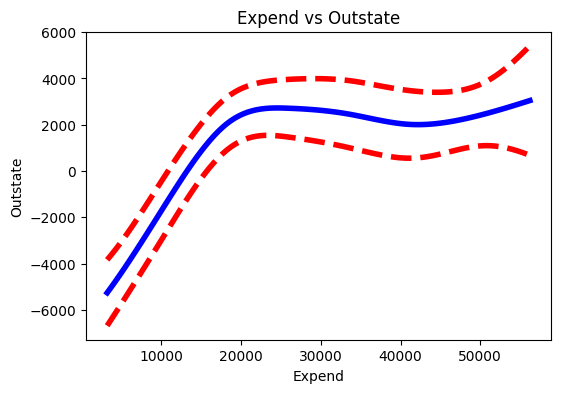

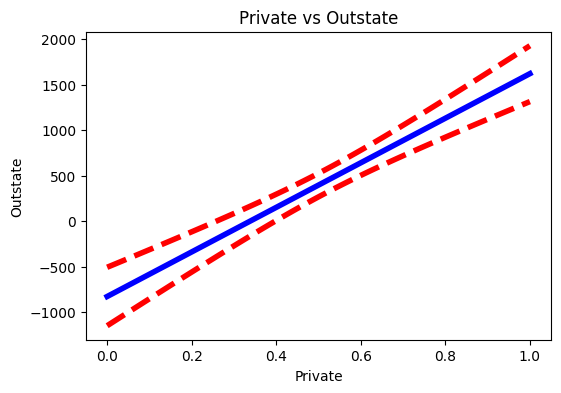

In [164]:
ind_f = features[-1]

for i in range(len(ind_f)):
  fig, ax = plt.subplots(1,1,figsize = (6,4))
  plot_gam(best_model, i, ax = ax)
  ax.set_title(ind_f[i] + " vs " + response)
  ax.set_xlabel(ind_f[i])
  ax.set_ylabel(response)

### Results - (b)

* Our results are great. Our MSE went down from 6e6 to around 3e6. So it dropped in half. We also produced plots for each of our features selected which was all of them except for the first feature.

### (c) Evaluate the model obtained on the test set, and explain the results obtained.

#### Results -(c)

* The model obtained was our smallest MSE from the best subset of features using forward selection. We brought in these features to our GAM then ran several different number of splines for the features. The most optimal number was selected than rerun on the given features. The result was a .5 decrease from our forward selection.

### (d) For which variables, if any, is there evidence of a non-linear relationship with the response?

* We can look at the gam_plots to decide which relationships are non-linear. From bottom up it looks like expend, top-10-percent, grad-rate, PhD, personal, p-undergrad, and books are all definitely non linear. The rest are linear or questionably linear.

## Question 11. In Section 7.7, it was mentioned that GAMs are generally ft using a backftting approach. The idea behind backftting is actually quite simple. We will now explore backfitting in the context of multiple linear regression.

*Suppose that we would like to perform multiple linear regression, but we do not have software to do so. Instead, we only have software to perform simple linear regression. Therefore, we take the following iterative approach: we repeatedly hold all but one coefficient estimate fixed at its current value, and update only that coefficient estimate using a simple linear regression. The process is continued until convergence—that is, until the coefficient estimates stop changing.

*We now try this out on a toy example.

### (a) Generate a response Y and two predictors X1 and X2, with n = 100.

In [165]:
X1 = np.random.randint(0, 50, 100)
X2 = np.random.randint(25, 75, 100)
Beta = [1.5, 3.75, 6.45]
y = Beta[0] + Beta[1]*X1 + Beta[2]* X2

### (b) Write a function simple_reg() that takes two arguments outcome and feature, fts a simple linear regression model with this outcome and feature, and returns the estimated intercept and slope.

In [168]:
df = pd.DataFrame({'X1': X1, 'X2': X2})
model = sm.OLS(y, sm.add_constant(df[['X1', 'X2']])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.940e+30
Date:                Fri, 12 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:13:49   Log-Likelihood:                 2757.8
No. Observations:                 100   AIC:                            -5510.
Df Residuals:                      97   BIC:                            -5502.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5000   9.76e-14   1.54e+13      0.000       1.500       1.500
X1             3.7500   1.81e-15   2.08e+15      0.000       3.750       3.750
X2             6.4500   1.74e-15    3.7e+15      0.000       6.450       6.450
==============================================================================
Omnibus:                        8.114   Durbin-Watson:                   0.076
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                4.346
Skew:                          -0.303   Prob(JB):                        0.114
Kurtosis:                       2.178   Cond. No.                         209.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Results (b) -

* We can can see it guesses both the coef well and the intercept as they are both close to the estimate.

### (c) Initialize beta1 to take on a value of your choice. It does not matter what value you choose.

In [193]:
beta0, beta1, beta2 = 100, 200, 300

### (d) Keeping beta1 fxed, use your function simple_reg() to fit the model:

* $Y − beta1 · X_{1} = β_{0} + β_{2}X_{2} + ϵ$

* Store the resulting values as $beta0$ and $beta2$.

In [179]:
model = sm.OLS( y - beta1 * df['X1'], sm.add_constant(df['X2'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     X1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.208e+32
Date:                Fri, 12 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:27:29   Log-Likelihood:                 2896.2
No. Observations:                 100   AIC:                            -5788.
Df Residuals:                      98   BIC:                            -5783.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5000   2.18e-14   6.88e+13      0.000       1.500       1.500
X2             6.4500   4.34e-16   1.49e+16      0.000       6.450       6.450
==============================================================================
Omnibus:                        3.540   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.694
Skew:                          -0.262   Prob(JB):                        0.260
Kurtosis:                       2.390   Cond. No.                         170.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [173]:
beta0, beta2 = model.params[0], model.params[1]
beta0, beta2

<ipython-input-173-09b88e2ba2be>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta0, beta2 = model.params[0], model.params[1]


(79.4675174886626, 6.417479310221749)

### (e) - Keeping beta2 fixed, fit the model

* * $Y − beta2 · X_{2} = β_{0} + β_{1}X_{1} + ϵ$

* Store the result as beta0 and beta1 (overwriting their previous values).

In [175]:
model = sm.OLS( y - beta2 * df['X2'], sm.add_constant(df['X1'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     X2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.212e+06
Date:                Fri, 12 Jul 2024   Prob (F-statistic):          2.39e-202
Time:                        18:24:14   Log-Likelihood:                -69.283
No. Observations:                 100   AIC:                             142.6
Df Residuals:                      98   BIC:                             147.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0682      0.094     32.709      0.000       2.882       3.254
X1             3.7497      0.003   1100.999      0.000       3.743       3.756
==============================================================================
Omnibus:                       35.837   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.270
Skew:                           0.092   Prob(JB):                       0.0435
Kurtosis:                       1.787   Cond. No.                         52.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
beta0, beta1 = model.params[0], model.params[1]
beta0, beta1

<ipython-input-176-532d6baf65bd>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta0, beta1 = model.params[0], model.params[1]


(3.0682408629129463, 3.749650218024234)

### (f) Write a for loop to repeat (c) and (d) 1,000 times. Report the estimates of beta0, beta1, and beta2 at each iteration of the for loop. Create a plot in which each of these values is displayed, with beta0, beta1, and beta2.

In [194]:
b0,b1,b2 = [], [], []
for i in range(1001):
  model = sm.OLS( y - beta1 * df['X1'], sm.add_constant(df['X2'])).fit()
  beta0, beta2 = model.params.iloc[0], model.params.iloc[1]
  model = sm.OLS( y - beta2 * df['X2'], sm.add_constant(df['X1'])).fit()
  beta0, beta1 = model.params.iloc[0], model.params.iloc[1]
  print(beta0, beta1, beta2)
  b0.append(beta0)
  b1.append(beta1)
  b2.append(beta2)

-93.19762133744348 3.7711214500751353 8.41374934430221
1.4898081473562228 3.7500022732007805 6.450211348961713
1.4999989030993683 3.750000000244654 6.450000022746483
1.4999999998818834 3.7500000000000266 6.450000000002449
1.499999999999703 3.7499999999999996 6.4500000000000055
1.4999999999998304 3.75 6.450000000000003
1.4999999999998304 3.75 6.450000000000003
1.4999999999998304 3.75 6.450000000000003
1.4999999999998304 3.75 6.450000000000003
1.4999999999998304 3.75 6.450000000000003
1.4999999999998304 3.75 6.450000000000003
1.4999999999998304 3.75 6.450000000000003
1.4999999999998304 3.75 6.450000000000003
1.4999999999998304 3.75 6.450000000000003
1.4999999999998304 3.75 6.450000000000003
1.4999999999998304 3.75 6.450000000000003
1.4999999999998304 3.75 6.450000000000003
1.4999999999998304 3.75 6.450000000000003
1.4999999999998304 3.75 6.450000000000003
1.4999999999998304 3.75 6.450000000000003
1.4999999999998304 3.75 6.450000000000003
1.4999999999998304 3.75 6.450000000000003
1.499999

Text(0.5, 0, 'Number of iterations')

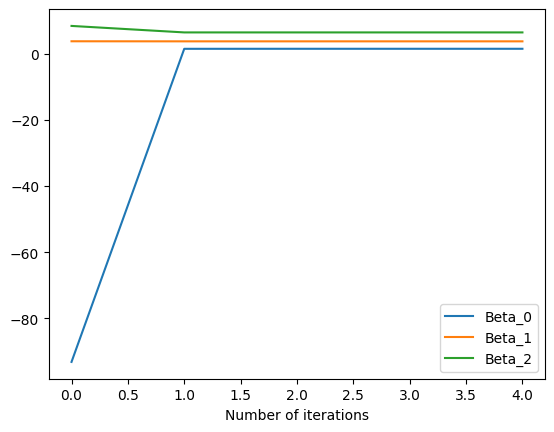

In [196]:
plt.plot(np.arange(0,5),b0[:5],label = 'Beta_0')
plt.plot(np.arange(0,5),b1[:5],label = 'Beta_1')
plt.plot(np.arange(0,5),b2[:5],label = 'Beta_2')
plt.legend()
plt.xlabel('Number of iterations')

### (g) Compare your answer in (e) to the results of simply performing multiple linear regression to predict Y using X1 and X2. Use axline() method to overlay those multiple linear regression coefcient estimates on the plot obtained in (e).

In [197]:
lr = LinearRegression()
model = lr.fit(df[['X1', 'X2']], y)
model.intercept_, model.coef_[0], model.coef_[1]

(1.4999999999997726, 3.7500000000000036, 6.450000000000002)

In [198]:
#Pretty Close to the actual estimates

Text(0.5, 0, 'Number of iterations')

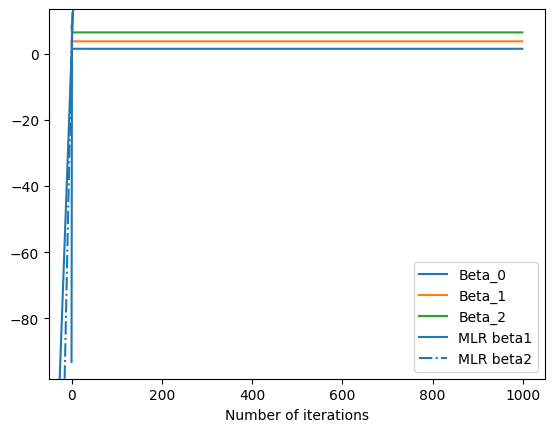

In [207]:
plt.plot(np.arange(0,1000),b0[:1000],label = 'Beta_0')
plt.plot(np.arange(0,1000),b1[:1000],label = 'Beta_1')
plt.plot(np.arange(0,1000),b2[:1000],label = 'Beta_2')
plt.axline( xy1 = (0,0) , slope = model.coef_[0], label = 'MLR beta1', linestyle = '-')
plt.axline( xy1 = (0,0) ,slope =model.coef_[1], label = 'MLR beta2', linestyle = '-.') # Assuming you want to plot beta2 starting at origin
plt.legend()
plt.xlabel('Number of iterations')

### (h) On this data set, how many backftting iterations were required in order to obtain a “good” approximation to the multiple regression coefcient estimates?

#### Results (h) -

* Only 2 backfitting opperations so relatively quick and lower computing power was needed.

## Question 12. This problem is a continuation of the previous exercise. In a toy example with p = 100, show that one can approximate the multiple linear regression coefficient estimates by repeatedly performing simple linear regression in a backftting procedure. How many backftting iterations are required in order to obtain a “good” approximation to the multiple regression coefficient estimates? Create a plot to justify your answer.

In [211]:
np.random.seed(1)
X = np.random.rand(100, 100)
tru_beta = np.linspace(0, 1000, 100)
y = np.dot(X, tru_beta) + np.random.normal(0,1,100)


In [219]:
from tqdm import tqdm
diffs = []
betas_estimated = np.ones((100,1))
mlr_betas = LinearRegression().fit(X,y).coef_[0]
# one iteration of backfitting
for _ in tqdm(range(1000)):
    for predictor in range(100):
        X_current = X[:,predictor]
        X_remaining = np.delete(X,predictor,axis = 1)
        weights_remaining = np.delete(betas_estimated,predictor,axis = 0)
        betas_estimated[predictor] = LinearRegression().fit(X_current.reshape(-1,1),y - np.dot(X_remaining,weights_remaining)).coef_[0]
    diffs.append(np.sum(np.abs(betas_estimated - tru_beta)))

100%|██████████| 1000/1000 [07:39<00:00,  2.18it/s]


Text(0.5, 0, 'Iterations')

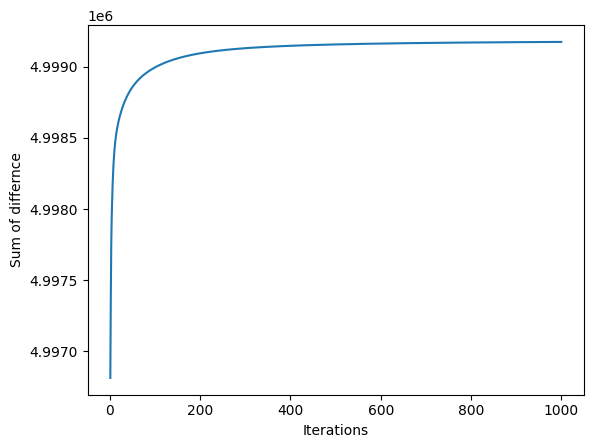

In [221]:
plt.plot(np.arange(1,1001),diffs)
plt.ylabel('Sum of differnce')
plt.xlabel('Iterations')

#### Results - (12)

* Seems that we need more iterations because we have more predictors. However around 200 it seems to be convering. It is odd how our sum of differences is increasing tho. I think I made a mistake in that regard, but it definitely should take more iterations. Thank you to hardikkamboj1@gmail.com for the code to for the 200 iterations.